<div style="background-color:#7FFFD4 ; padding:10px; border-radius:5px;">

1. По стилю кода: обратите внимание, что в функциях и методах, параметр от аргумента и знака = не разделяется пробелами. . т.е. должно быть вот так:

df = pd.read_csv('air_data.csv', sep=';') **[ИСПРАВЛЕНО]**

2. Каждая строка - уникальная покупка. Удаляем дубликаты, или уточняем прежде это вопрос у заказчика. **[УЧТУ В ДАЛЬНЕЙШЕМ]**

3. 3.2 С выбросами было бы хорошо увидеть боксплот с ним и без или распределение выручки. и сколько именно мы удалили значений (%) при разных подходах.  См. условия задачи **[[ИСПРАВЛЕНО](#32)]**

4. 3.5 лучше с сортировкой столбчатые диаграммы по направлениям **[[ИСПРАВЛЕНО](#35)]**
5. 3.6 С корреляцией не плохо, но про какую именно зависимость идет речь и что делать с категориальными признаками **[[ИСПРАВЛЕНО. Добавлена матрица корреляций, проведена кодировка One-Hot Encoding Категориального признака + добавлена интерпретация параметра](#36)]**
</div>

# Интерактивное оглавление
Нажмите на пункт работы и перенесетесь к его началу

1. [Познакомьтесь с данными.](#1)
2. [Осуществите предобработку данных.](#2)
    - [2.1 Приведите заголовки к удобному виду.](#3)
    - [2.2 Проверьте типы данных.](#4)
    - [2.3 Обработайте пропуски.](#5)
    - [2.4 Проверьте наличие дубликатов.](#6)
    - [2.5 Исключите нулевые значения в выручке для дальнейшего исследования.](#7)
3. [Исследовательский анализ данных](#30):
     - [3.1 Создайте отчет о динамике продаж (выручке). Постройте линейный график. Повторите отчет с детализацией по полям: FFP_FLAG, ROUTE_FLIGHT_TYPE, SALE_TYPE. Постройте общие отчеты по выручке по типам пассажиров, по типам перелета, по способам покупки, по программам лояльности. Визуализируйте каждый отчет. Решение о детализации отчетов примите самостоятельно.](#31)
     - [3.2 Исследуйте выручку, примите решение об исключении выбросов для дальнейшего исследования, руководствуясь минимизацией потерь в данных.](#32)
     - [3.3 Исследуйте сезонность продаж. Дополнительно проверьте гипотезу о том, что выручка от продаж осенью и зимой отличается. Исследуйте выручку и число продаж по месяцам, проверьте корреляцию.](#33)
     - [3.4 Клиенты покупают билеты в разное время. Кто-то покупает билеты заранее, другие - в последний момент. Проверьте гипотезу о том, что выручка от продажи билетов для этих двух групп клиентов отличается. Предварительно разбейте клиентов минимум на три группы.](#34)
     - [3 .5  Определите топ-10 популярных направлений перелета (город-город) отдельно для ВМЛ и МВЛ. Изучите выручку для этих направлений.](#35)
     - [3.6 Определите есть ли зависимость выручки от других признаков. Постройте матрицу корреляций.](#36)
4. [Вывод](#0)

In [1]:
# импортируем библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import warnings
from matplotlib.pyplot import figure
warnings.filterwarnings('ignore')
import seaborn as sns
import numpy as np
from scipy.stats import t, norm
from scipy import stats

Считаю данные файла с датасетом: <a id="1"></a>

In [2]:
data = pd.read_csv('air_data.csv', sep=';')
data.sample(4)

,ISSUE_DATE,FLIGHT_DATE_LOC,PAX_TYPE,REVENUE_AMOUNT,ORIG_CITY_CODE,DEST_CITY_CODE,ROUTE_FLIGHT_TYPE,FFP_FLAG,SALE_TYPE
1265,2021-12-16 00:00:00,2022-01-15 00:00:00,AD,210,MOW,VOG,ВВЛ,FFP,OFFLINE
786,2022-03-22 00:00:00,2022-08-20 00:00:00,AD,650,KGD,OVB,ВВЛ,NaN,ONLINE
20459,2022-09-09 00:00:00,2022-09-30 00:00:00,AD,500,MOW,OGZ,ВВЛ,NaN,OFFLINE
40946,2022-06-09 00:00:00,2022-09-18 00:00:00,AD,380,AER,MOW,ВВЛ,NaN,OFFLINE


## Предобработка данных <a id="2"></a>

Прежде всего приведу заголовки столбцов к cnake_case для удобства считывания <a id="3"></a>

In [3]:
data.columns = data.columns.str.lower()
data.sample(1)

,issue_date,flight_date_loc,pax_type,revenue_amount,orig_city_code,dest_city_code,route_flight_type,ffp_flag,sale_type
228,2021-12-04 00:00:00,2022-01-07 00:00:00,INF,0,MOW,AER,ВВЛ,NaN,ONLINE


Теперь проверю типы данных. Возможно некоторые типы стоит изменить на более подходящие.<a id="4"></a>

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   issue_date         50000 non-null  object
 1   flight_date_loc    50000 non-null  object
 2   pax_type           50000 non-null  object
 3   revenue_amount     50000 non-null  int64 
 4   orig_city_code     49998 non-null  object
 5   dest_city_code     49999 non-null  object
 6   route_flight_type  50000 non-null  object
 7   ffp_flag           19398 non-null  object
 8   sale_type          50000 non-null  object
dtypes: int64(1), object(8)
memory usage: 3.4+ MB


Переведу столбцы `issue_date` и `flight_date_loc` к типу datetime, чтобы в будущем можно было работать с временным форматом. Избавлюсь от указания времени, так как меня интересует только дата.

In [5]:
data['issue_date'] = pd.to_datetime(data['issue_date'])
data['flight_date_loc'] = pd.to_datetime(data['flight_date_loc'])

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   issue_date         50000 non-null  datetime64[ns]
 1   flight_date_loc    50000 non-null  datetime64[ns]
 2   pax_type           50000 non-null  object        
 3   revenue_amount     50000 non-null  int64         
 4   orig_city_code     49998 non-null  object        
 5   dest_city_code     49999 non-null  object        
 6   route_flight_type  50000 non-null  object        
 7   ffp_flag           19398 non-null  object        
 8   sale_type          50000 non-null  object        
dtypes: datetime64[ns](2), int64(1), object(6)
memory usage: 3.4+ MB


Теперь типы данных в порядке. Далее обработаю пропуски. <a id="5"></a>

In [7]:
data.isna().sum()

issue_date               0
flight_date_loc          0
pax_type                 0
revenue_amount           0
orig_city_code           2
dest_city_code           1
route_flight_type        0
ffp_flag             30602
sale_type                0
dtype: int64

Пропуски есть в трех столбцах:

* orig_city_code
* dest_city_code
* ffp_flag

ffp_flag показывает наличие программы лояльности. Следовательно, если ffp флаг не выставлен, буду считать, что программа лояльности у клиента отсутствует. Заменю пропуски на значение 'None'. Так будет удобнее ореинтироваться в данных в дальнейшем

In [8]:
data['ffp_flag'] = data['ffp_flag'].fillna('None')

Осталось три пропуска. Их можно сразу удалить, поскольку они сотавляют менее 0.001% данных. Однако ради интереса изучу соответствующие строчки.

In [9]:
data.query('orig_city_code.isnull() or dest_city_code.isnull()')

,issue_date,flight_date_loc,pax_type,revenue_amount,orig_city_code,dest_city_code,route_flight_type,ffp_flag,sale_type
2020,2022-02-17,2022-03-22,AD,440,NaN,KHV,МВЛ,None,ONLINE
8100,2022-05-02,2022-05-11,AD,440,NaN,KHV,МВЛ,None,OFFLINE
47582,2022-05-13,2022-07-28,AD,440,KHV,NaN,МВЛ,None,OFFLINE


Ничего особенного в этих строках нет. Их удаление не повлияет хоть сколько-то значительно на дальнейший анализ

In [10]:
data = data.drop(index=data.query('orig_city_code.isnull() or dest_city_code.isnull()').index.to_list()).reset_index(drop=True)

Перепроерю наличие пропусков

In [11]:
data.isnull().sum()

issue_date           0
flight_date_loc      0
pax_type             0
revenue_amount       0
orig_city_code       0
dest_city_code       0
route_flight_type    0
ffp_flag             0
sale_type            0
dtype: int64

Пропусков нет. Перейду к анализу дубликатов. <a id="6"></a>

In [12]:
data.duplicated().sum()

169

Имеем 867 дубликатов. Это 1.7% данных. Столько строк удалять нельзя. Рассмотрю что за дубликаты мы имеем

In [13]:
duplicate = data[data.duplicated()]
duplicate.sort_values(by='flight_date_loc')

,issue_date,flight_date_loc,pax_type,revenue_amount,orig_city_code,dest_city_code,route_flight_type,ffp_flag,sale_type
44007,2021-10-01,2021-10-02,AD,270,MOW,KZN,ВВЛ,FFP,ONLINE
19039,2021-10-07,2021-10-13,AD,350,VVO,OVB,ВВЛ,None,ONLINE
19034,2021-10-13,2021-10-14,AD,460,UUS,VVO,ВВЛ,FFP,ONLINE
48514,2021-10-10,2021-10-14,AD,380,OVB,OMS,ВВЛ,FFP,ONLINE
48656,2021-10-10,2021-10-15,AD,580,OVB,MJZ,ВВЛ,None,OFFLINE
...,...,...,...,...,...,...,...,...,...
17418,2022-09-26,2022-09-27,AD,1140,MOW,KEJ,ВВЛ,None,OFFLINE
49255,2022-09-30,2022-10-01,AD,200,MOW,KZN,ВВЛ,None,OFFLINE
49262,2022-09-30,2022-10-01,AD,260,MOW,KZN,ВВЛ,None,OFFLINE
49289,2022-09-13,2022-10-03,AD,460,UUD,KHV,ВВЛ,None,OFFLINE


Да, дубликаты есть. Однако специфика данных такова, что мы рассматриваем билеты на самолет БЕЗ уникальных идентификаторов или уточненных временных маркеров. Таким образом, например, один человек может купить несколько билетов на самолет (для себя и жены, к примеру), не имея программы лояльности. В таком случае покупка будет совершена в один день, даты полета будут совпадать, тип пассажиров, стоимость билетов, город отправления, назначения и все прочие характеристики покупки, учитываемые в этой таблице.

Не смотря на то, что фактически два разных человека полетят на самолете, записи о покупке их билетов будут иметь идентичный вид. Кроме того, все данные имеют ограниченный и регламентированный набор уникальных значений, что исключает позможность порождения неявных дубликатов.

Поэтому не буду удалять дубликаты.

Теперь исключу нулевые значения выручки. Возможно это билеты, которые были возвращены в кассу и поэтому итоговая выручка для компании по ним нулевая <a id="7"></a>

In [14]:
print('Билетов с нулевой выручкой до: ', data[data['revenue_amount']==0].count()[2])
data = data.drop(index=data.query('revenue_amount==0').index.to_list()).reset_index(drop=True)

Билетов с нулевой выручкой до:  466


In [15]:
print('Билетов с нулевой выручкой после: ', data[data['revenue_amount']==0].count()[2])

Билетов с нулевой выручкой после:  0


На этом предобработка данных завершена. Еще раз просмотрю приведенные в новую кондицию данные, чтобы удостовериться в отсутствии ошибок:

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49531 entries, 0 to 49530
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   issue_date         49531 non-null  datetime64[ns]
 1   flight_date_loc    49531 non-null  datetime64[ns]
 2   pax_type           49531 non-null  object        
 3   revenue_amount     49531 non-null  int64         
 4   orig_city_code     49531 non-null  object        
 5   dest_city_code     49531 non-null  object        
 6   route_flight_type  49531 non-null  object        
 7   ffp_flag           49531 non-null  object        
 8   sale_type          49531 non-null  object        
dtypes: datetime64[ns](2), int64(1), object(6)
memory usage: 3.4+ MB


In [17]:
data

,issue_date,flight_date_loc,pax_type,revenue_amount,orig_city_code,dest_city_code,route_flight_type,ffp_flag,sale_type
0,2021-12-07,2022-01-11,AD,200,MOW,KGD,ВВЛ,None,ONLINE
1,2021-12-31,2022-01-03,AD,610,UUS,OVB,ВВЛ,None,OFFLINE
2,2021-11-28,2022-01-04,AD,390,KGD,MOW,ВВЛ,FFP,ONLINE
3,2021-12-08,2022-01-05,AD,190,VOZ,MOW,ВВЛ,None,ONLINE
4,2021-12-08,2022-01-12,AD,190,MOW,KRR,ВВЛ,FFP,OFFLINE
...,...,...,...,...,...,...,...,...,...
49526,2022-06-11,2022-06-22,CHD,480,MOW,OMS,ВВЛ,None,ONLINE
49527,2022-06-06,2022-06-20,AD,270,LED,MOW,ВВЛ,None,OFFLINE
49528,2022-06-26,2022-06-29,AD,230,MOW,KZN,ВВЛ,FFP,ONLINE
49529,2022-06-26,2022-06-28,AD,270,KZN,MOW,ВВЛ,None,OFFLINE


Теперь приступю к анализу обработанных данных

## Исследовательский анализ данных <a id="30"></a>

Построю график динамики продаж <a id="31"></a>

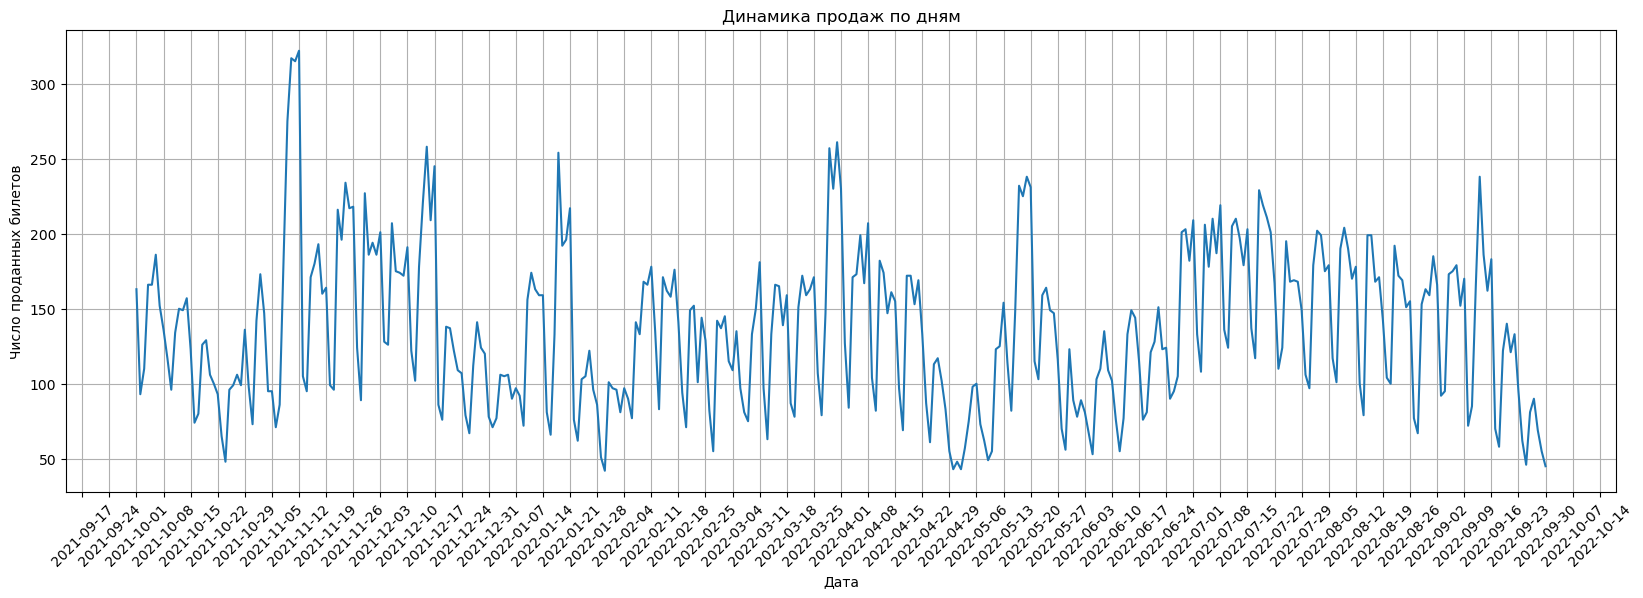

In [18]:
import matplotlib.dates as mdates

plt.figure(figsize=(20, 6))
plt.plot(data.groupby(by='issue_date')['revenue_amount'].count())
locator = mdates.DayLocator(interval=7)
plt.gca().xaxis.set_major_locator(locator)

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

plt.xticks(rotation=45)

plt.xlabel('Дата')
plt.ylabel('Число проданных билетов')
plt.title('Динамика продаж по дням')

plt.grid()
plt.show()

Беря во внимание тот факт, что на данном графике отметки дат - это пятницы, можно сделать следующие выводы:

- Люди **значительно** реже покупают билеты в выходные дни. Эта закономерность не зависит от года наблюдения / сезона / месяца
- Пик продаж - будние дни в середине рабочей недели (вторник-четверг)
- Сложно говорить о сезонной закономерности продаж, поскольку данные собраны лишь чуть более чем за год

Построю график динамики выручки

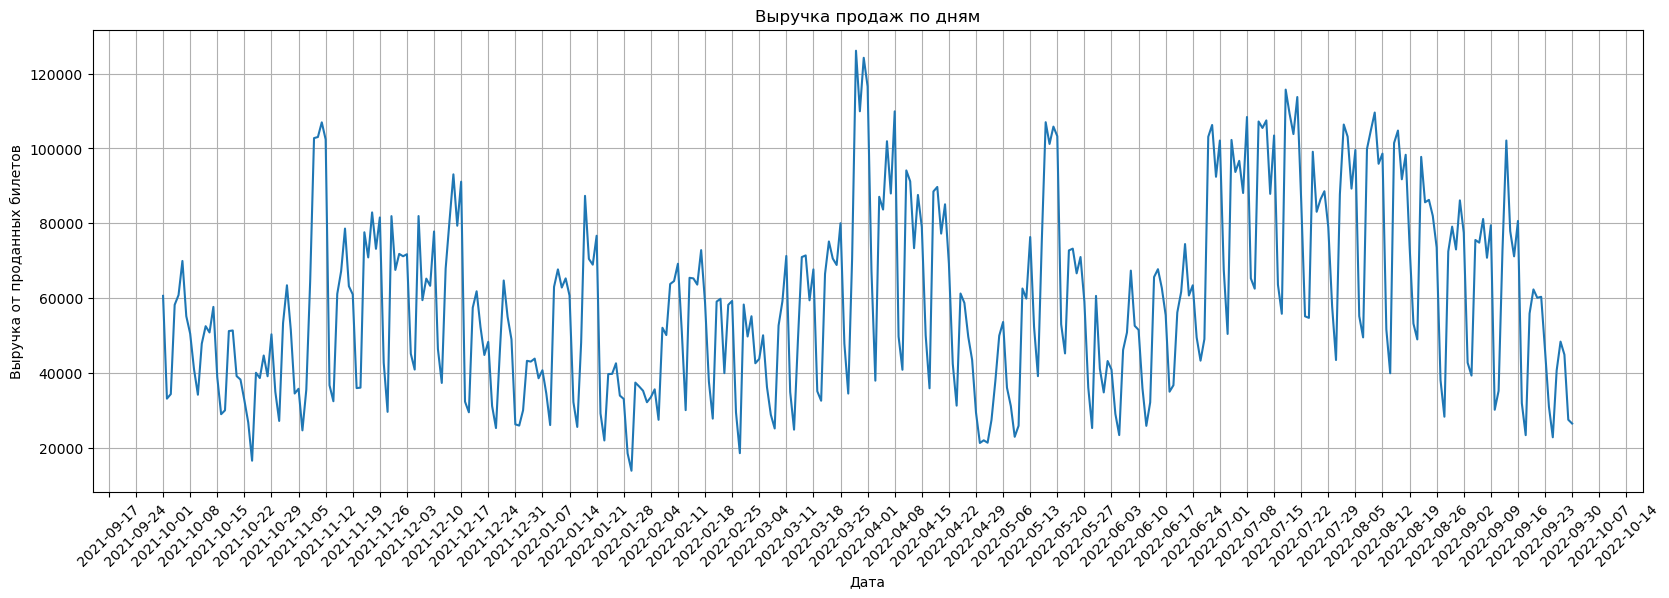

In [19]:
import matplotlib.dates as mdates

plt.figure(figsize=(20, 6))
plt.plot(data.groupby(by='issue_date')['revenue_amount'].sum())
locator = mdates.DayLocator(interval=7)
plt.gca().xaxis.set_major_locator(locator)

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

plt.xticks(rotation=45)

plt.xlabel('Дата')
plt.ylabel('Выручка от проданных билетов')
plt.title('Выручка продаж по дням')

plt.grid()
plt.show()

Чтобы исследовать выбросы в данных и принять решение об их исключении, можно воспользоваться следующими шагами: <a id="32"></a>

- остроить статистики по данным о выручке (например, среднее, стандартное отклонение).
- Определить границы выбросов, например, используя метод "3 сигм" (значения, выходящие за пределы 𝜇±3𝜎).
- Исключить выбросы для минимизации потерь данных.

In [20]:
data_iqr = data.copy()
data_std = data.copy()
data_percentile = data.copy()

Q1 = data['revenue_amount'].quantile(0.25)
Q3 = data['revenue_amount'].quantile(0.75)
IQR = Q3 - Q1
data_iqr = data_iqr[(data_iqr['revenue_amount'] >= Q1 - 1.5 * IQR) & (data_iqr['revenue_amount'] <= Q3 + 1.5 * IQR)]

mean = data['revenue_amount'].mean()
std = data['revenue_amount'].std()
data_std = data_std[(data_std['revenue_amount'] >= mean - 3 * std) & (data_std['revenue_amount'] <= mean + 3 * std)]

lower_bound = data['revenue_amount'].quantile(0.01)
upper_bound = data['revenue_amount'].quantile(0.99)
data_percentile = data_percentile[(data_percentile['revenue_amount'] >= lower_bound) & (data_percentile['revenue_amount'] <= upper_bound)]

total_data_count = len(data)
removed_data_iqr = (total_data_count - len(data_iqr)) / total_data_count * 100
removed_data_std = (total_data_count - len(data_std)) / total_data_count * 100
removed_data_percentile = (total_data_count - len(data_percentile)) / total_data_count * 100

# Определим метод с минимальным количеством удаленных данных
results = {
    "IQR": removed_data_iqr,
    "Standard Deviation": removed_data_std,
    "Percentile": removed_data_percentile
}
print(results)
best_method = min(results, key=results.get)
print(f"Метод с минимальным процентом удаленных данных: {best_method} ({results[best_method]:.2f}%)")


{'IQR': 2.0189376350164547, 'Standard Deviation': 0.9529385637277664, 'Percentile': 1.6474531101734267}
Метод с минимальным процентом удаленных данных: Standard Deviation (0.95%)


Построю ящик с усами по имеющимся данным, чтобы оценить выбросы:

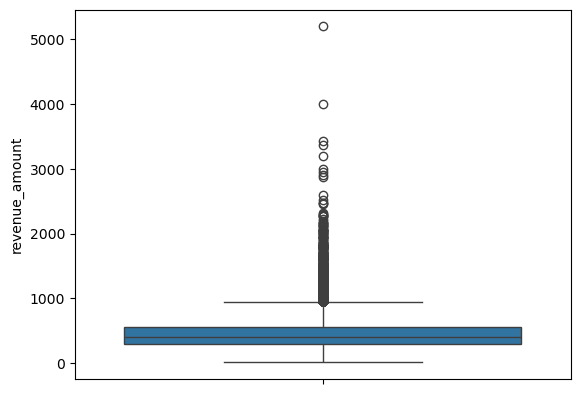

In [21]:
sns.boxplot(data = data['revenue_amount'])
lenbef = len(data)

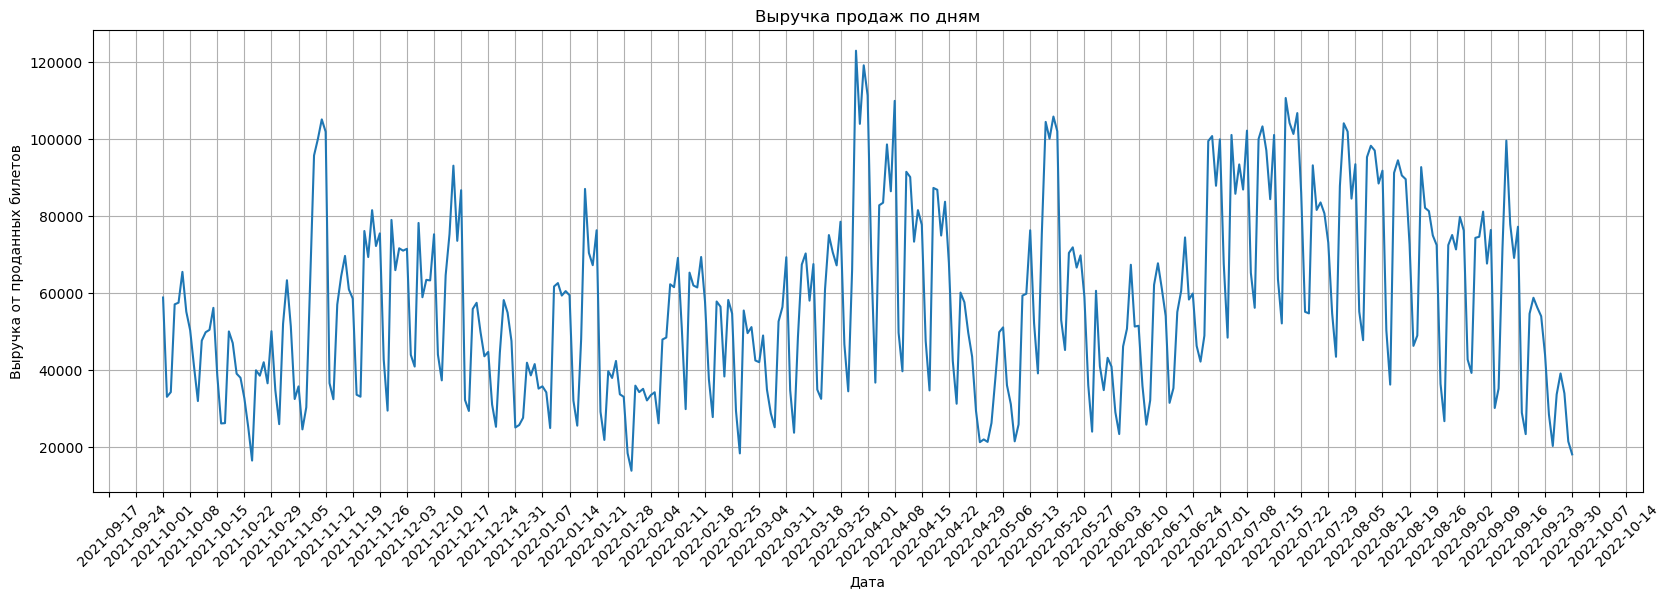

In [22]:
# Установим границы на основе процентилей
lower_bound = data['revenue_amount'].quantile(0.01)
upper_bound = data['revenue_amount'].quantile(0.99)

# Оставим только значения в пределах этих границ
data = data[(data['revenue_amount'] >= lower_bound) & (data['revenue_amount'] <= upper_bound)]


# Построим график выручки после удаления выбросов
plt.figure(figsize=(20, 6))
plt.plot(data.groupby('issue_date')['revenue_amount'].sum())
plt.xlabel('Дата')
plt.ylabel('Выручка от проданных билетов')
plt.title('Выручка продаж по дням')
locator = mdates.DayLocator(interval=7)
plt.gca().xaxis.set_major_locator(locator)

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

plt.xticks(rotation=45)
plt.grid()
plt.show()

Построил график динамики выручки после удаления выбросов и перейду к анализу данных метрик. Дополнительно построю boxplot После чистки:

<Axes: ylabel='revenue_amount'>

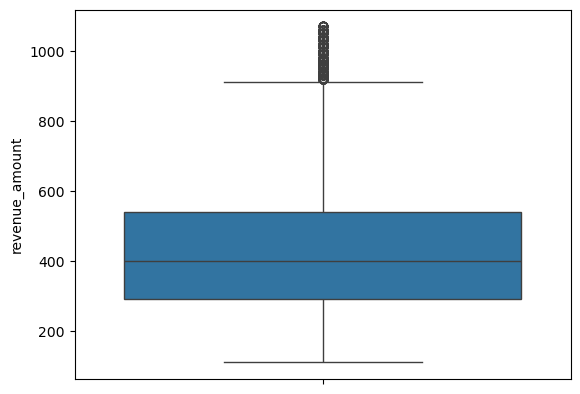

In [23]:
sns.boxplot(data = data['revenue_amount'])

In [24]:
print('Удалено' , ((lenbef/len(data))-1)*100, '% данных')

Удалено 1.6750487529508362 % данных


Теперь детализирую вышепостроенный график по параметру наличия у покупателя программы лояльности. Проанализирую сначала генерируемую ими выручку, а затем сравню количество таких пользователей. Логичным будет ожидать, что большую выручку будет генерировать та группа, что численно больше

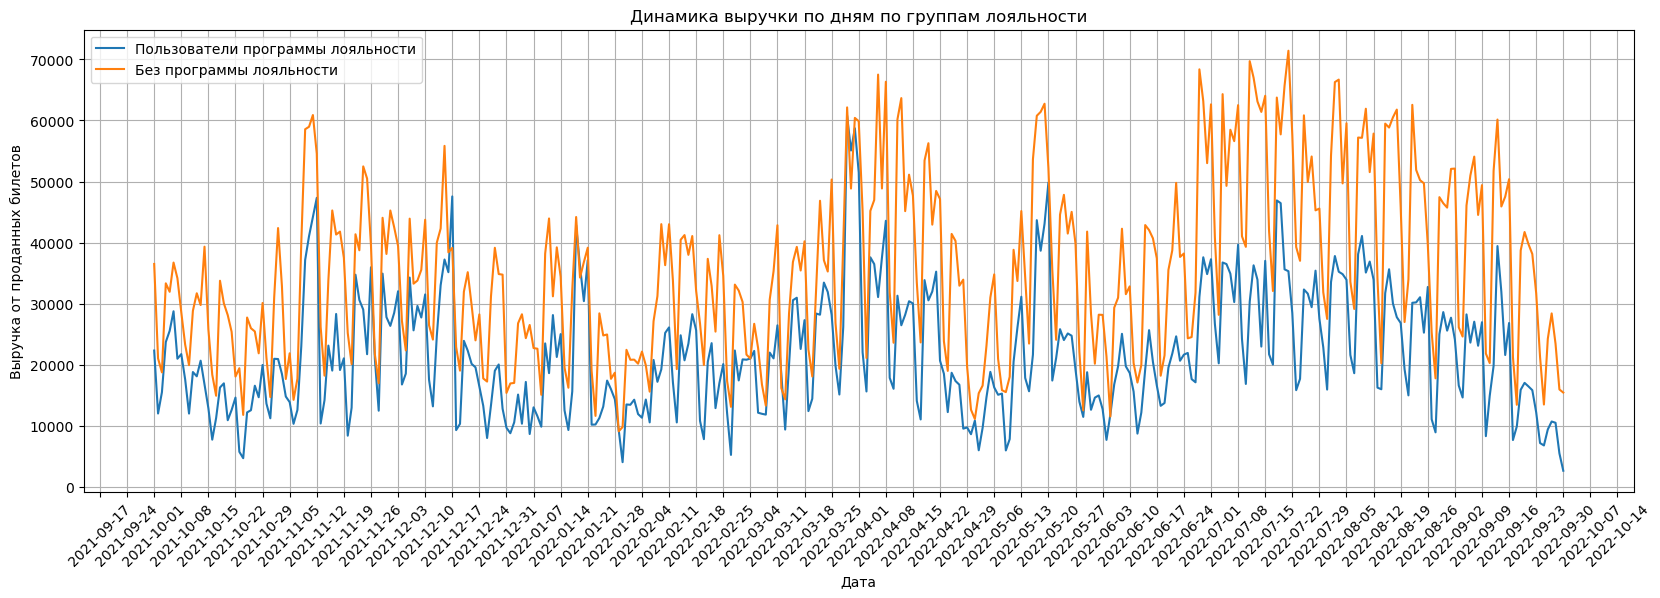

In [25]:
plt.figure(figsize=(20, 6))
plt.plot(data[data['ffp_flag']=='FFP'].groupby(by='issue_date')['revenue_amount'].sum(), label='Пользователи программы лояльности')
plt.plot(data[data['ffp_flag']=='None'].groupby(by='issue_date')['revenue_amount'].sum(), label='Без программы лояльности')
locator = mdates.DayLocator(interval=7)
plt.gca().xaxis.set_major_locator(locator)

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

plt.xticks(rotation=45)

plt.xlabel('Дата')
plt.ylabel('Выручка от проданных билетов')
plt.title('Динамика выручки по дням по группам лояльности')

plt.legend()
plt.grid()
plt.show()

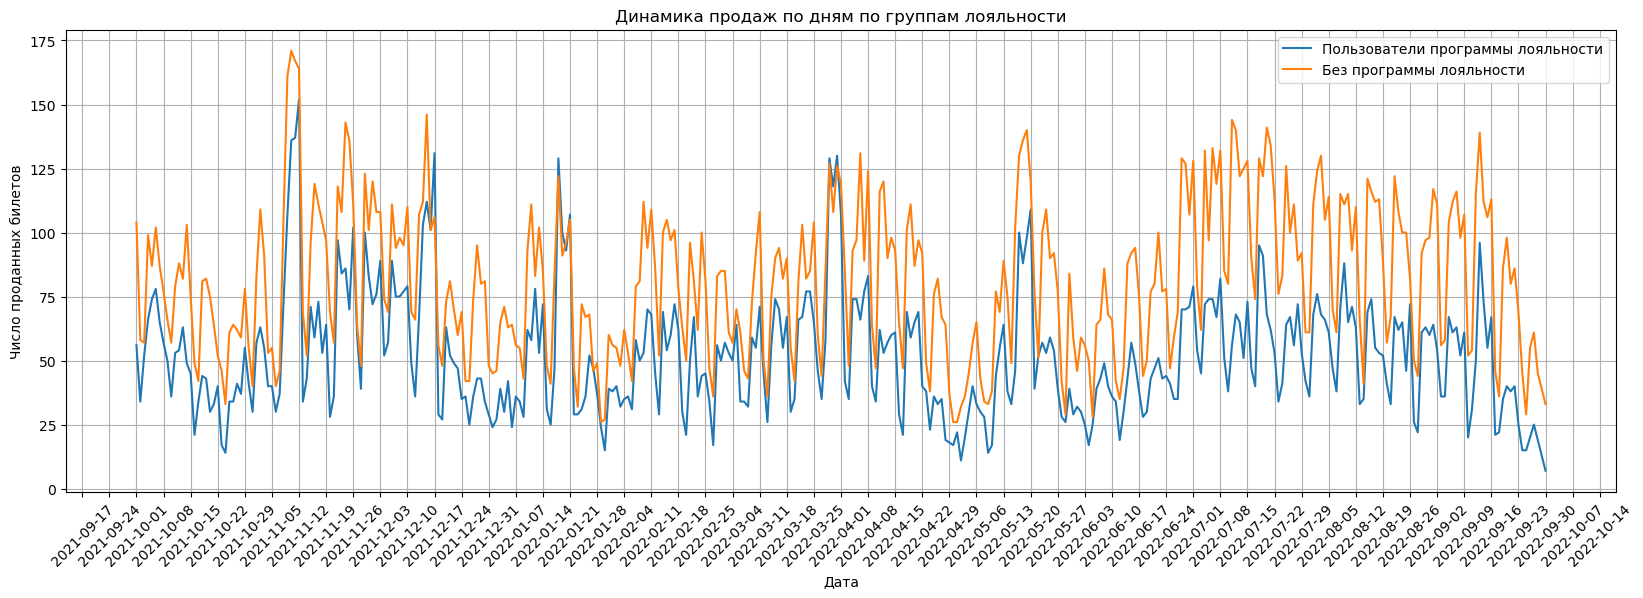

In [26]:
plt.figure(figsize=(20, 6))
plt.plot(data[data['ffp_flag'] == 'FFP'].groupby(by='issue_date')['revenue_amount'].count(), label='Пользователи программы лояльности')
plt.plot(data[data['ffp_flag'] == 'None'].groupby(by='issue_date')['revenue_amount'].count(), label='Без программы лояльности')
locator = mdates.DayLocator(interval=7)
plt.gca().xaxis.set_major_locator(locator)

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

plt.xticks(rotation=45)

plt.xlabel('Дата')
plt.ylabel('Число проданных билетов')
plt.title('Динамика продаж по дням по группам лояльности')

plt.legend()
plt.grid()
plt.show()

Большинство клиентов не имеют программы лояльности и генерируют наибольшую выручку. Я пока что не удалял выбросы и аномальные значения, поэтому посмотрю медианные выручки по каждой из двух групп:

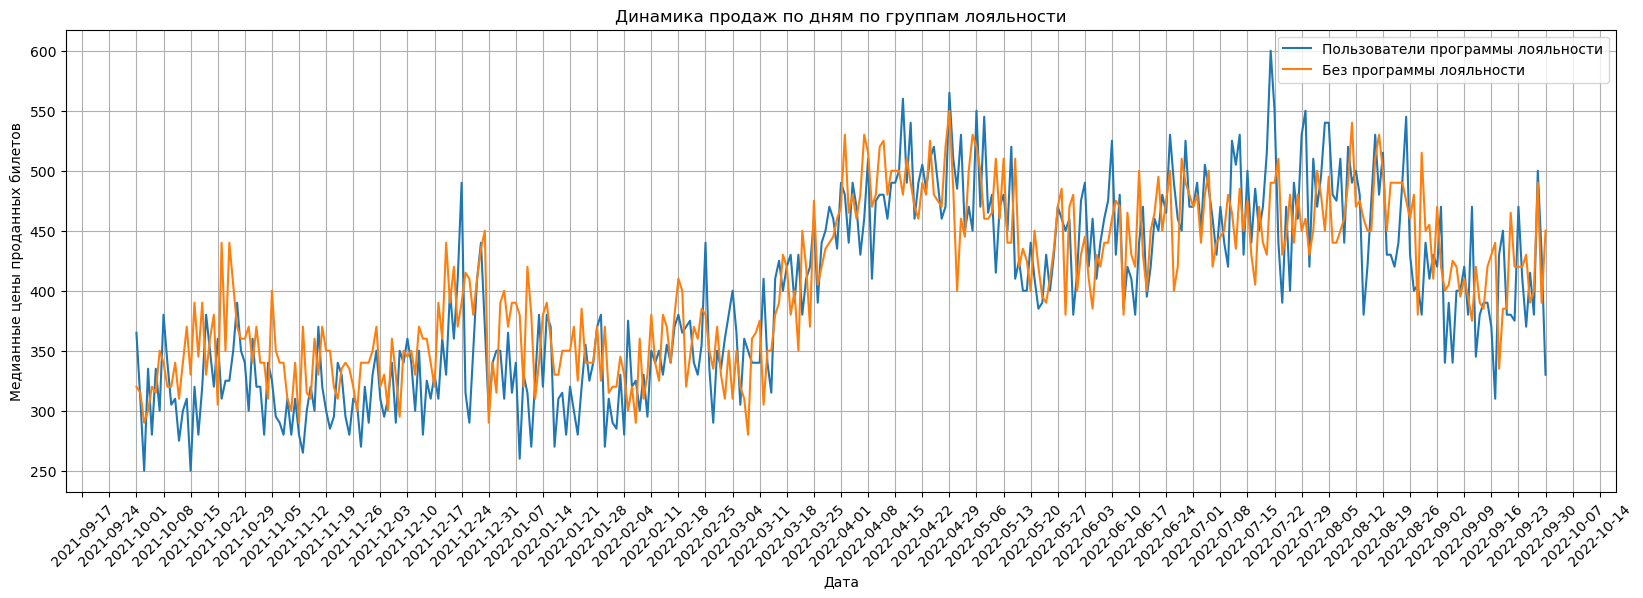

In [27]:
plt.figure(figsize=(20, 6))
plt.plot(data[data['ffp_flag'] =='FFP'].groupby(by='issue_date')['revenue_amount'].median(), label='Пользователи программы лояльности')
plt.plot(data[data['ffp_flag'] =='None'].groupby(by='issue_date')['revenue_amount'].median(), label='Без программы лояльности')
locator = mdates.DayLocator(interval=7)
plt.gca().xaxis.set_major_locator(locator)

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

plt.xticks(rotation=45)

plt.xlabel('Дата')
plt.ylabel('Медианные цены проданных билетов')
plt.title('Динамика продаж по дням по группам лояльности')

plt.legend()
plt.grid()
plt.show()

In [28]:
online_sales = data[data['ffp_flag']=='FFP']['revenue_amount'].cumsum().reset_index(drop=True)
offline_sales = data[data['ffp_flag']=='None']['revenue_amount'].cumsum().reset_index(drop=True)

# Приводим длину массивов к одинаковой (в случае, если количество продаж различается)
max_len = max(len(online_sales), len(offline_sales))
online_sales = online_sales.reindex(range(max_len), fill_value=online_sales.max())
offline_sales = offline_sales.reindex(range(max_len), fill_value=offline_sales.max())

cumulative_revenue = pd.DataFrame({
    'FFP': online_sales,
    'NO FFP': offline_sales
})

cumulative_revenue.tail(1)

,FFP,NO FFP
29705,7967800,12997260


Где-то больше, где-то меньше, но медианные ценные проданных билетов в обеих группах примерно совпадают.

По результатам анализа кумулятивной выручки этих двух групп можно сказать, что за исследуемый период наибольшую выручку принесли пользователи, которые НЕ имеют программу лояльности



Теперь сравню популярность внутренних и международных перелетов

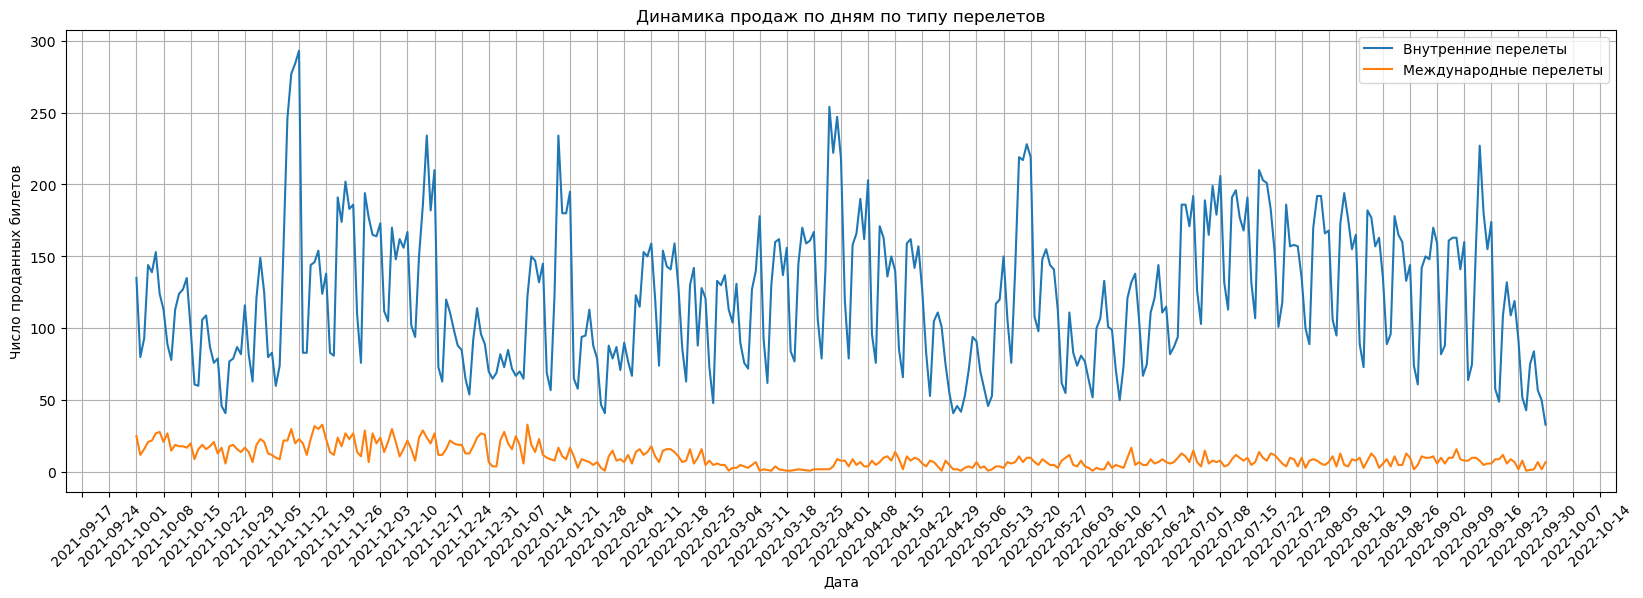

In [29]:
plt.figure(figsize=(20, 6))
plt.plot(data[data['route_flight_type']=='ВВЛ'].groupby(by='issue_date')['revenue_amount'].count(), label='Внутренние перелеты')
plt.plot(data[data['route_flight_type']=='МВЛ'].groupby(by='issue_date')['revenue_amount'].count(), label='Международные перелеты')
locator = mdates.DayLocator(interval=7)
plt.gca().xaxis.set_major_locator(locator)

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

plt.xticks(rotation=45)

plt.xlabel('Дата')
plt.ylabel('Число проданных билетов')
plt.title('Динамика продаж по дням по типу перелетов')

plt.legend()
plt.grid()
plt.show()

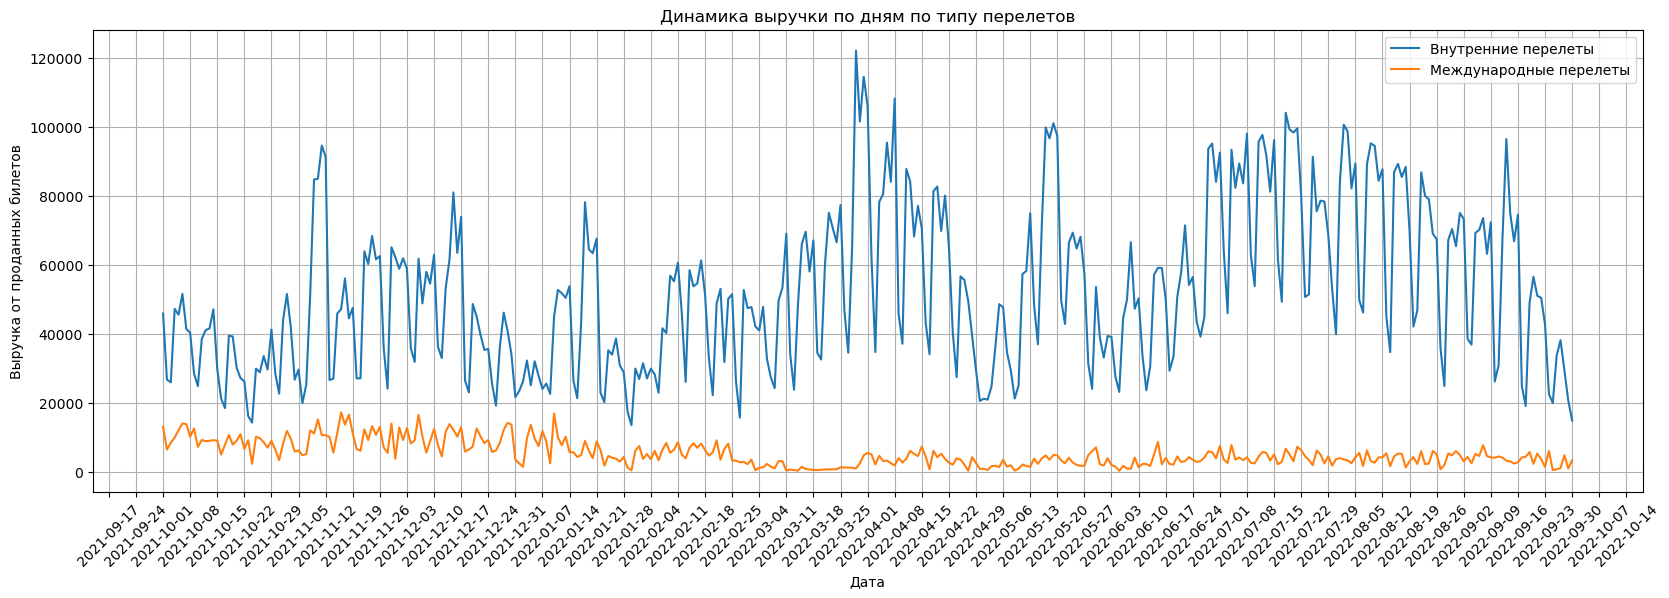

In [30]:
plt.figure(figsize=(20, 6))
plt.plot(data[data['route_flight_type']=='ВВЛ'].groupby(by='issue_date')['revenue_amount'].sum(), label='Внутренние перелеты')
plt.plot(data[data['route_flight_type']=='МВЛ'].groupby(by='issue_date')['revenue_amount'].sum(), label='Международные перелеты')
locator = mdates.DayLocator(interval=7)
plt.gca().xaxis.set_major_locator(locator)

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

plt.xticks(rotation=45)

plt.xlabel('Дата')
plt.ylabel('Выручка от проданных билетов')
plt.title('Динамика выручки по дням по типу перелетов')

plt.legend()
plt.grid()
plt.show()

Как видно, в 2021-2022 годах внутренние перелеты доминируют на рынке авиаперелетов и генерируют подавляющие объёмы выручки, даже не смотря на то, что цены на международные перелеты значительно выше

In [31]:
online_sales = data[data['route_flight_type']=='ВВЛ']['revenue_amount'].cumsum().reset_index(drop=True)
offline_sales = data[data['route_flight_type']=='МВЛ']['revenue_amount'].cumsum().reset_index(drop=True)

# Приводим длину массивов к одинаковой (в случае, если количество продаж различается)
max_len = max(len(online_sales), len(offline_sales))
online_sales = online_sales.reindex(range(max_len), fill_value=online_sales.max())
offline_sales = offline_sales.reindex(range(max_len), fill_value=offline_sales.max())

cumulative_revenue = pd.DataFrame({
    'ВВЛ': online_sales,
    'МВЛ': offline_sales
})

cumulative_revenue.tail(1)

,ВВЛ,МВЛ
44916,19079420,1885640


По результатам анализа кумулятивной выручки этих двух групп можно сказать, что за исследуемый период наибольшую выручку принесли пользователи, которые летали внутренними рейсами


Теперь сравню популярность онлайн и оффлайн покупок билетов

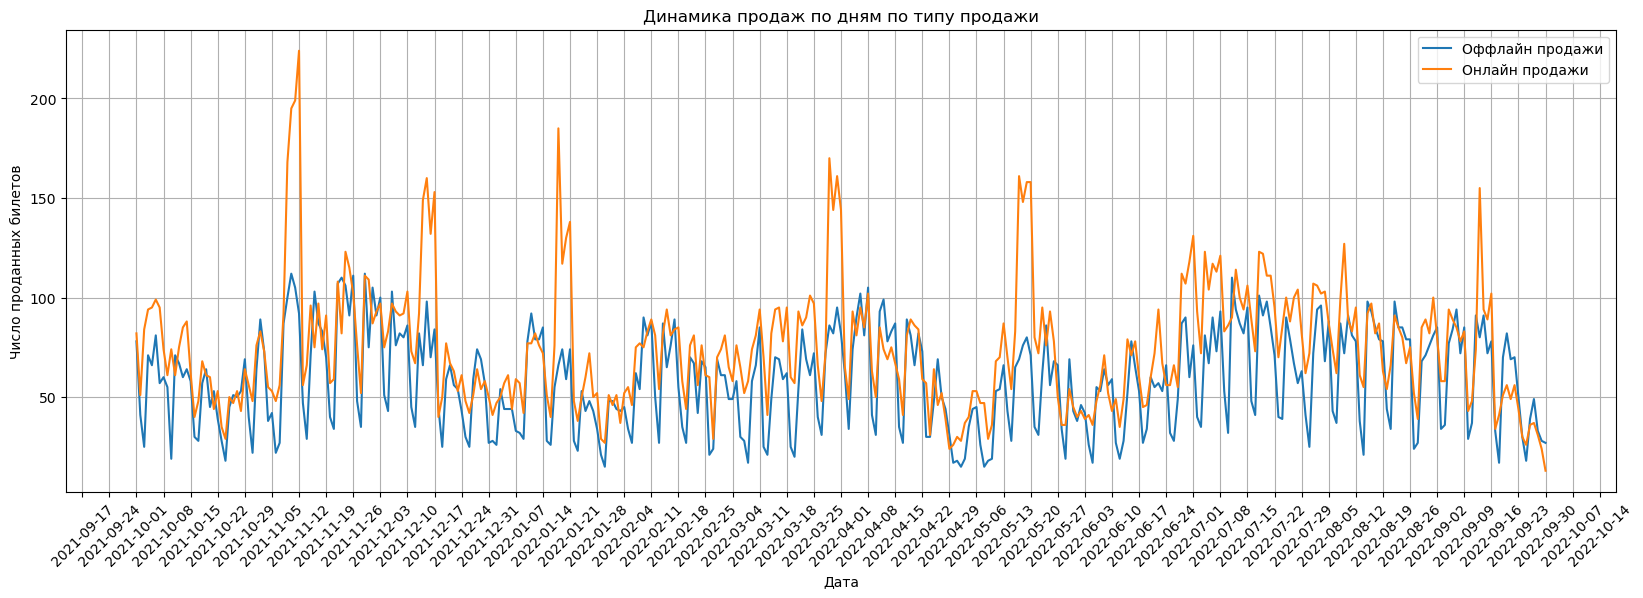

In [32]:
plt.figure(figsize=(20, 6))
plt.plot(data[data['sale_type']=='OFFLINE'].groupby(by='issue_date')['revenue_amount'].count(), label='Оффлайн продажи')
plt.plot(data[data['sale_type']=='ONLINE'].groupby(by='issue_date')['revenue_amount'].count(), label='Онлайн продажи')
locator = mdates.DayLocator(interval=7)
plt.gca().xaxis.set_major_locator(locator)

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

plt.xticks(rotation=45)

plt.xlabel('Дата')
plt.ylabel('Число проданных билетов')
plt.title('Динамика продаж по дням по типу продажи')

plt.legend()
plt.grid()
plt.show()

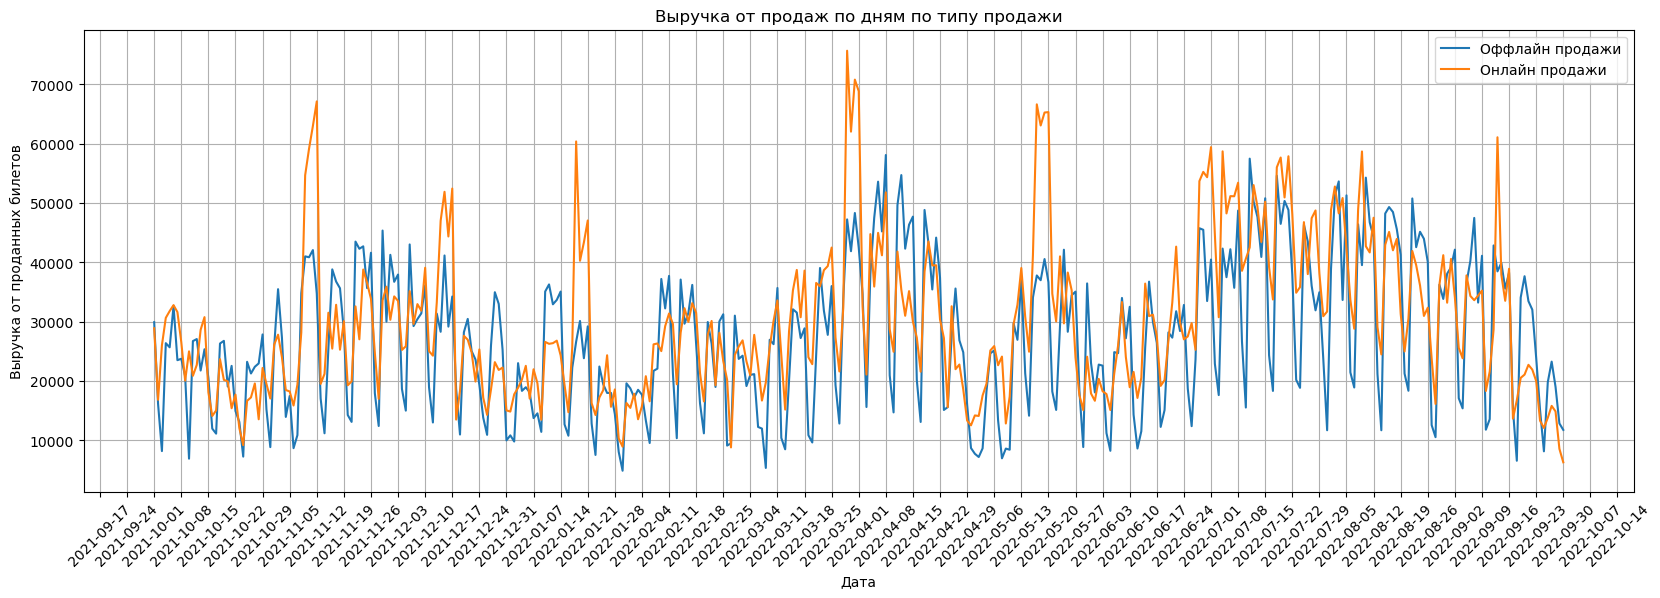

In [33]:
plt.figure(figsize=(20, 6))
plt.plot(data[data['sale_type']=='OFFLINE'].groupby(by='issue_date')['revenue_amount'].sum(), label='Оффлайн продажи')
plt.plot(data[data['sale_type']=='ONLINE'].groupby(by='issue_date')['revenue_amount'].sum(), label='Онлайн продажи')
locator = mdates.DayLocator(interval=7)
plt.gca().xaxis.set_major_locator(locator)

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

plt.xticks(rotation=45)

plt.xlabel('Дата')
plt.ylabel('Выручка от проданных билетов')
plt.title('Выручка от продаж по дням по типу продажи')

plt.legend()
plt.grid()
plt.show()

In [34]:
online_sales = data[data['sale_type']=='ONLINE']['revenue_amount'].cumsum().reset_index(drop=True)
offline_sales = data[data['sale_type']=='OFFLINE']['revenue_amount'].cumsum().reset_index(drop=True)

# Приводим длину массивов к одинаковой (в случае, если количество продаж различается)
max_len = max(len(online_sales), len(offline_sales))
online_sales = online_sales.reindex(range(max_len), fill_value=online_sales.max())
offline_sales = offline_sales.reindex(range(max_len), fill_value=offline_sales.max())

cumulative_revenue = pd.DataFrame({
    'online': online_sales,
    'offline': offline_sales
})

cumulative_revenue.tail(1)

,online,offline
27335,11002320,9962740


По результатам анализа кумулятивной выручки этих двух групп можно сказать, что за исследуемый период наибольшую выручку принесли пользователи, которые
совершал ОНЛАЙН покупки.

Перейду к анлизу сезонности продаж. Визуализирую динамику продаж по месяцам, поскольку детализация вплоть до дней мешает легко воспринимать данные <a id="33"></a>

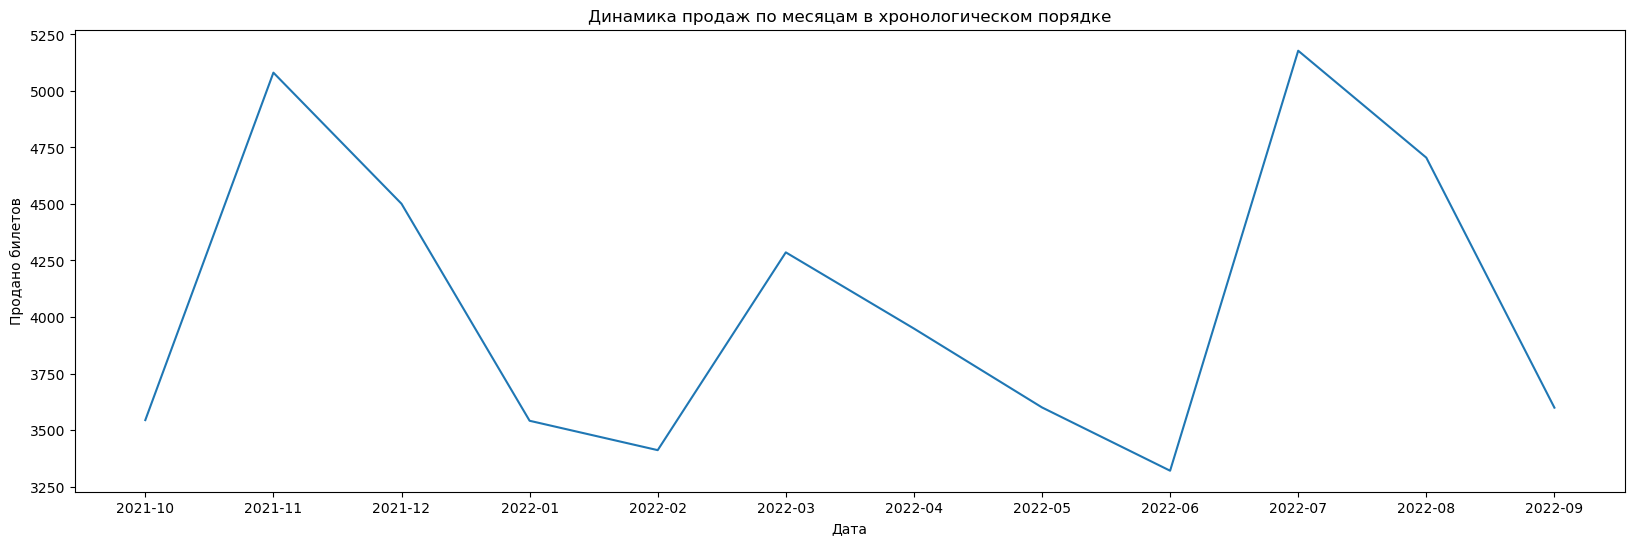

In [35]:
plt.figure(figsize=(20, 6))
data['monthy'] = pd.to_datetime(data['issue_date']).dt.strftime('%Y-%m')
data['month'] = pd.DatetimeIndex(data['issue_date']).month

plt.plot(data.groupby(by='monthy')['revenue_amount'].count())
plt.title('Динамика продаж по месяцам в хронологическом порядке')
plt.xlabel('Дата')
plt.ylabel('Продано билетов');

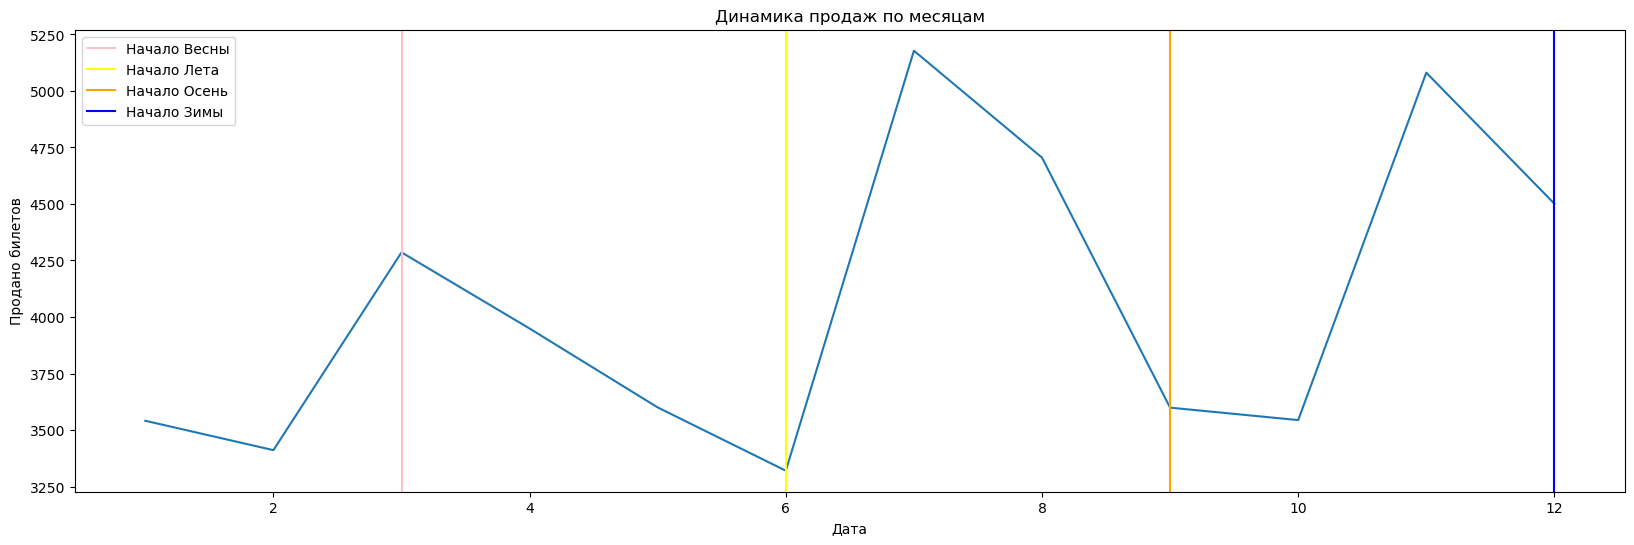

In [36]:
plt.figure(figsize=(20, 6))
plt.plot(data.groupby(by='month')['revenue_amount'].count())

plt.axvline(x=3, color='pink', label='Начало Весны')
plt.axvline(x=6, color='yellow', label='Начало Лета')
plt.axvline(x=9, color='orange', label='Начало Осень')
plt.axvline(x=12, color='blue', label='Начало Зимы')
plt.legend()

plt.title('Динамика продаж по месяцам')
plt.xlabel('Дата')
plt.ylabel('Продано билетов');

Не сложно заметить, что пик продаж - июль и ноябрь.

Теперь изучим аналогично выручку по продажам.

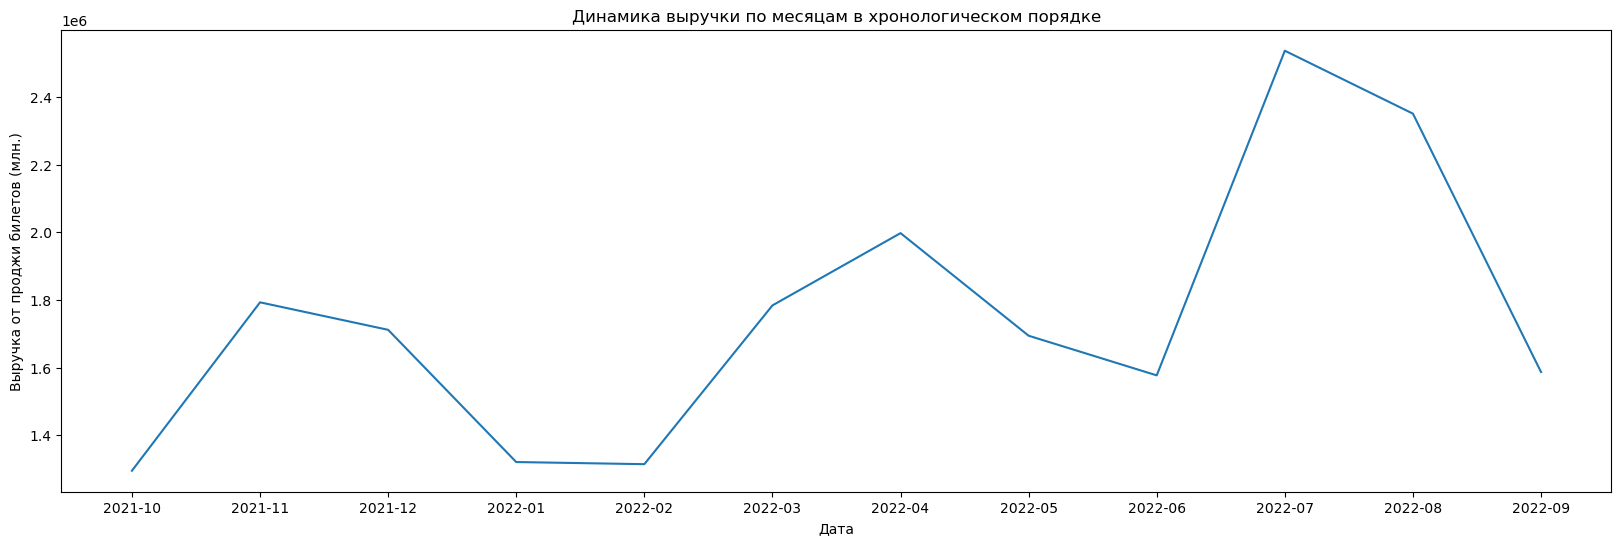

In [37]:
plt.figure(figsize=(20, 6))
plt.plot(data.groupby(by='monthy')['revenue_amount'].sum())
plt.title('Динамика выручки по месяцам в хронологическом порядке')
plt.xlabel('Дата')
plt.ylabel('Выручка от проджи билетов (млн.)');

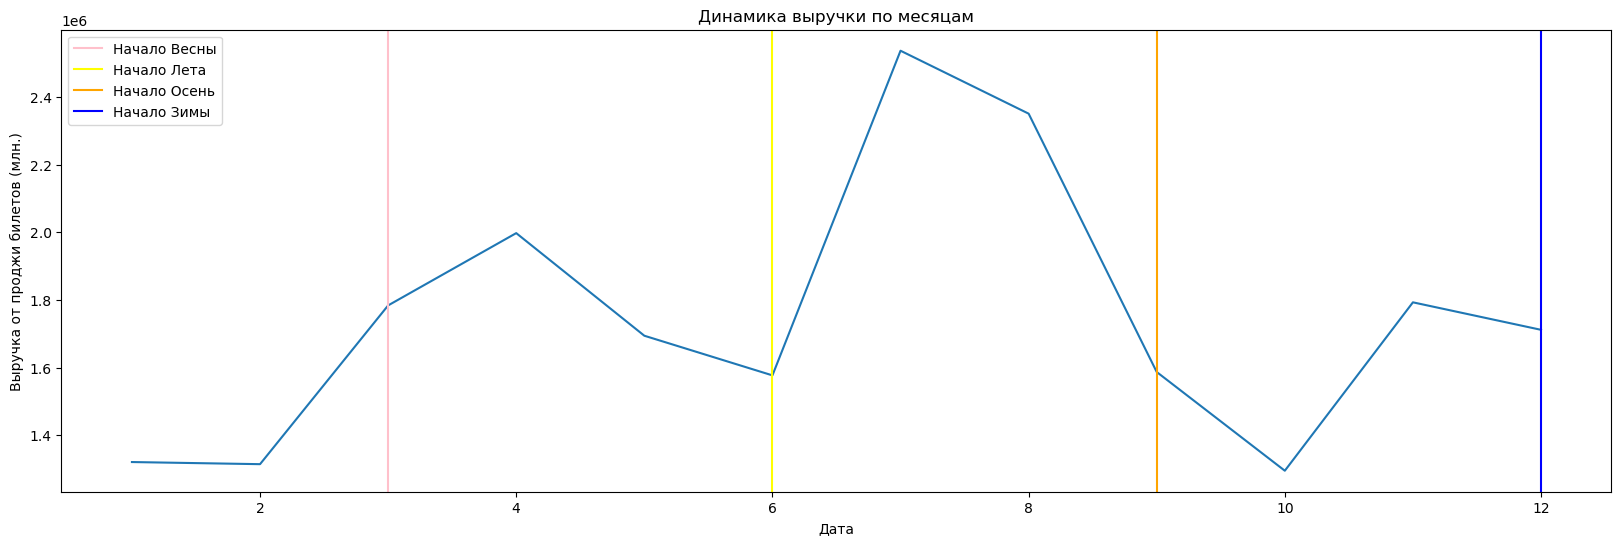

In [38]:
plt.figure(figsize=(20, 6))
plt.plot(data.groupby(by = 'month')['revenue_amount'].sum())

plt.axvline(x=3, color='pink', label='Начало Весны')
plt.axvline(x=6, color='yellow', label='Начало Лета')
plt.axvline(x=9, color='orange', label='Начало Осень')
plt.axvline(x=12, color='blue', label='Начало Зимы')
plt.legend()

plt.title('Динамика выручки по месяцам')
plt.xlabel('Дата')
plt.ylabel('Выручка от проджи билетов (млн.)');

Наилучшие месяцы по выручке от продажи билетов - апрель и июль.

Проверю как коррелируют эти метрики (выручка и число продаж). Наиболее удобно это будет воспринимать через гексогональный график кореляции:

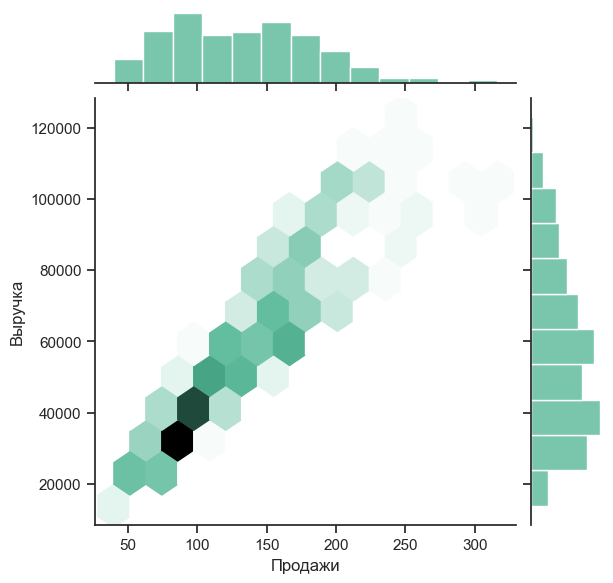

In [39]:
import seaborn as sns
sns.set_theme(style="ticks")
sns.jointplot(x = data.groupby(by='issue_date')['revenue_amount'].count(), 
              y = data.groupby(by='issue_date')['revenue_amount'].sum(), 
              kind='hex', 
              color="#4CB391")
plt.xlabel('Продажи')
plt.ylabel('Выручка');

По построенному графику корреляции можно сделать вывод о том, что существует прямая положительная корреляция между числом проданных билетов и выручкой от них.

 Теперь дополнительно проверю гипотезу о том, что выручка от продаж осенью и зимой отличается.
 В таком случае:
 * Гипотеза H0: Нет статистически значимой разницы в выручке осенью и зимой
 * Гипотеза H1: Есть статистически значима разница в выручке осенью и зимой

Прежде всего добавлю маркер сезонности. Поделю все продажи на зимние, летние, осенние и весенние:

In [40]:
def get_season(month):
    if month in [12, 1, 2]:
        return 'Зима'
    elif month in [3, 4, 5]:
        return 'Весна'
    elif month in [6, 7, 8]:
        return 'Лето'
    elif month in [9, 10, 11]:
        return 'Осень'

# Добавление нового столбца с временем года
data['season'] = data['month'].apply(get_season)

Проведу статистический тест в соответствии с нормальностью распределения.

In [41]:
autumn_data = data[data['season']=='Осень']['revenue_amount']
winter_data = data[data['season']=='Зима']['revenue_amount']

_, p_value_autumn = stats.shapiro(autumn_data)
_, p_value_winter = stats.shapiro(winter_data)

if p_value_autumn > 0.05 and p_value_winter > 0.05:
    # Если данные нормально распределены, выполняем t-тест
    t_stat, p_value = stats.ttest_ind(autumn_data, winter_data)
    test_type = 't-тест'
else:
    # Если данные не нормально распределены, выполняем тест Манна-Уитни
    t_stat, p_value = stats.mannwhitneyu(autumn_data, winter_data)
    test_type = 'тест Манна-Уитни'

print(f"Тип теста: {test_type}")
print(f"Статистика: {t_stat}\np-value: {p_value}")

if p_value < 0.05:
    print("Выручка осенью и зимой статистически значимо отличается.")
else:
    print("Нет статистически значимой разницы в выручке осенью и зимой.")

Тип теста: тест Манна-Уитни
Статистика: 70428527.5
p-value: 0.4155970496160444
Нет статистически значимой разницы в выручке осенью и зимой.


Принимаем нулевую гипотезу

Далее проверю гипотезу о том, что выручка от продажи билетов для этих групп клиентов в зависимости от того насколько заранее ои приобрели билеты. <a id="34"></a>

Предварительно разобью клиентов на чотыре группы.

In [42]:
data['ddifference'] = (data['flight_date_loc'] - data['issue_date']).dt.days

In [43]:
def get_hurry(ddifference):
    if ddifference in list(range(1, 7)):
        return 'В последнюю неделю'
    elif ddifference in list(range(7, 31)):
        return 'За месяц'
    elif ddifference in list(range(31, 999)):
        return 'Более чем за месяц'
    elif ddifference == 0:
        return 'День в день'
    else:
        return 'something went wrong'

# Добавление нового столбца с временем года
data['hurry'] = data['ddifference'].apply(get_hurry)

Мои дальнейшие действия потребуют пояснений:

Сформулирую гипотезы:
* H0 - Средние значения выручки одинаковы для всех групп клиентов (далее - значение по hurry)
* H1 - Средние значения выручки не одинаковы для всех групп клиентов (далее - значение по hurry)

Для множественного сравнения групп, я проведу дисперсионный анализ ANOVA, но я не могу со 100% вероятностью утверждать, что я могу провести его корректно, а для этого необходимо проверить предпосылки:
1) Нормальность распределения остатков в каждой группе
2) Гомогенность дисперсий между группами (это проверю при помощи теста Левена)

Помимо этого я буду считать, что все покупки - независимые, поскольку данных для опровержения этого допущения не имеем.

=============================================================================================

Далее, если все предпосылки будут получены, то проведу ANOVA-тест по значению по hurry. А чтобы не плодить множество t-тестов попарного сравнения, я проведу тест Тьюки, который автоматизирует попарные вычисления. 

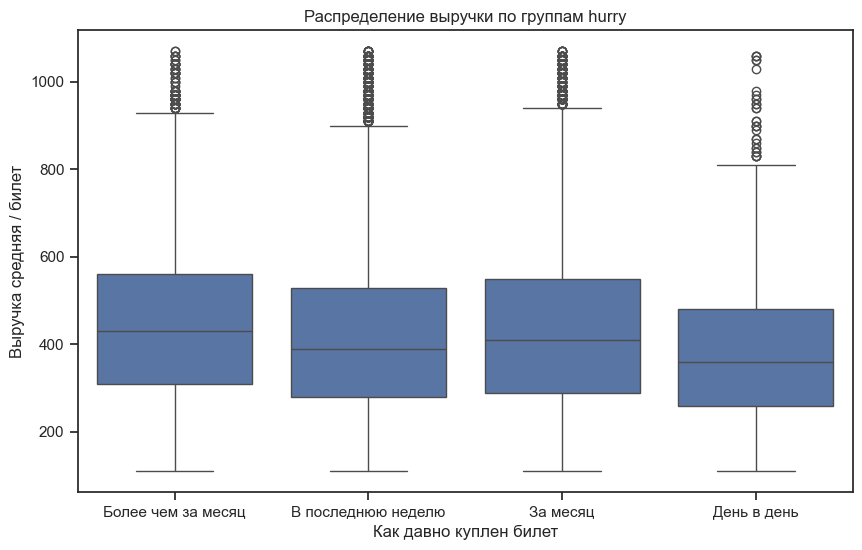

Тест Левена на гомогенность дисперсий: p-value = 3.096843675855669e-10
Результаты ANOVA: F-статистика = 52.12221941223494, p-value=1.2614437279599847e-33
Есть статистически значимые различия между группами hurry.

             Multiple Comparison of Means - Tukey HSD, FWER=0.05             
      group1             group2       meandiff p-adj  lower    upper   reject
-----------------------------------------------------------------------------
Более чем за месяц В последнюю неделю -20.3512   0.0 -26.3088 -14.3937   True
Более чем за месяц        День в день -58.1719   0.0 -72.1464 -44.1973   True
Более чем за месяц           За месяц -11.2574   0.0 -17.1595  -5.3553   True
В последнюю неделю        День в день -37.8207   0.0 -51.4046 -24.2367   True
В последнюю неделю           За месяц   9.0938   0.0   4.1876     14.0   True
       День в день           За месяц  46.9145   0.0  33.3547  60.4742   True
-----------------------------------------------------------------------------


In [44]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd


plt.figure(figsize=(10, 6))
sns.boxplot(x='hurry', y=data['revenue_amount'], data=data)
plt.title('Распределение выручки по группам hurry')
plt.xlabel('Как давно куплен билет')
plt.ylabel('Выручка средняя / билет')
plt.show()


stat, p_levene = stats.levene(
    data.loc[data['hurry']=='В последнюю неделю', 'revenue_amount'],
    data.loc[data['hurry']=='За месяц', 'revenue_amount'],
    data.loc[data['hurry']=='Более чем за месяц', 'revenue_amount'],
    data.loc[data['hurry']=='День в день', 'revenue_amount']
)
print(f'Тест Левена на гомогенность дисперсий: p-value = {p_levene}')

# Если p-value > 0.05, дисперсии считаются гомогенными, можем продолжать с ANOVA

# 2. Проведение однофакторного ANOVA
f_stat, p_anova = stats.f_oneway(
    data.loc[data['hurry']=='В последнюю неделю', 'revenue_amount'],
    data.loc[data['hurry']=='За месяц', 'revenue_amount'],
    data.loc[data['hurry']=='Более чем за месяц', 'revenue_amount'],
    data.loc[data['hurry']=='День в день', 'revenue_amount']
)

print(f'Результаты ANOVA: F-статистика = {f_stat}, p-value={p_anova}')

# 3. Если p-value < 0.05, есть статистически значимые различия между группами
if p_anova < 0.05:
    print("Есть статистически значимые различия между группами hurry.\n")
    
    # 4. Проведение post-hoc теста Тьюки
    tukey = pairwise_tukeyhsd(endog=data['revenue_amount'], groups=data['hurry'], alpha=0.05)
    print(tukey)
else:
    print("Нет статистически значимых различий между группами hurry.")

По результатам проведенного статистического анализа, мы ОТКЛОНЯЕМ нулевую гипотезу. Есть статистически значимые различия между группами hurry.

Так как не было четких указаний по какой метрике выручки сравнивать группы hurry я дополнительно проведу статистический тест с гипотезами, которые описал выше, но уже для абсолютных кумулятивных значений.

Для сравнения суммарных значений нужно сначала вычислить общую выручку для каждой группы hurry, а затем можно использовать, например, тест Краскела-Уоллиса для проверки значимости различий, так как ANOVA предназначен для сравнения средних значений. Однако тест для сумм не требует таких предпосылок (нормальности и гомогенности дисперсий).

Суммарная выручка по группам:
                hurry  revenue_amount
0  Более чем за месяц         4343150
1  В последнюю неделю         7751800
2         День в день          507030
3            За месяц         8363080


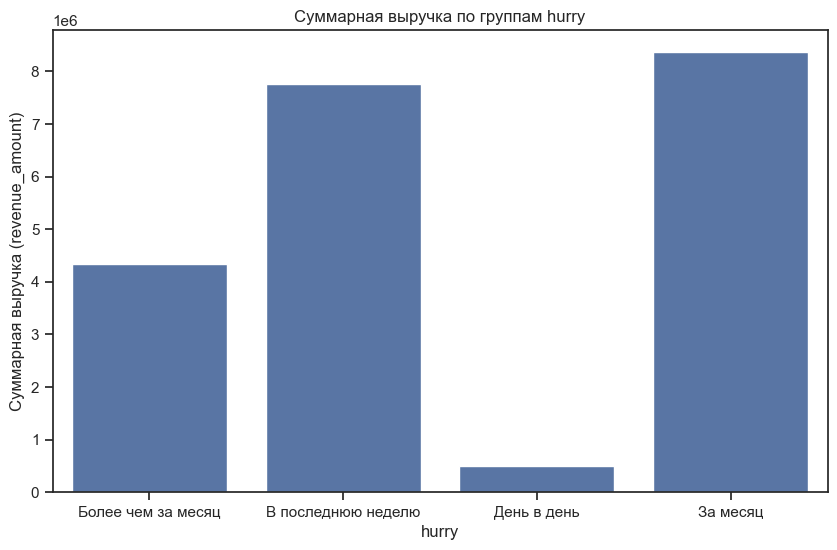

Результаты теста Краскела-Уоллиса: H-статистика=242.27203559184014, 
p-value=3.0702181775746457e-52
Есть статистически значимые различия в суммарной выручке между группами hurry.


In [45]:
# 1. Рассчитаем суммарную выручку для каждой группы
grouped_revenue = data.groupby('hurry')['revenue_amount'].sum().reset_index()

print("Суммарная выручка по группам:")
print(grouped_revenue)

# 2. Построим график суммарной выручки по группам
plt.figure(figsize=(10, 6))
sns.barplot(x='hurry', y='revenue_amount', data=grouped_revenue)
plt.title('Суммарная выручка по группам hurry')
plt.ylabel('Суммарная выручка (revenue_amount)')
plt.show()

# 3. Проверим различие суммарной выручки между группами с помощью теста Краскела-Уоллиса
h_stat, p_kruskal = stats.kruskal(
    data.loc[data['hurry']=='В последнюю неделю', 'revenue_amount'],
    data.loc[data['hurry']=='За месяц', 'revenue_amount'],
    data.loc[data['hurry']=='Более чем за месяц', 'revenue_amount'],
    data.loc[data['hurry']=='День в день', 'revenue_amount']
)

print(f'Результаты теста Краскела-Уоллиса: H-статистика={h_stat}, \np-value={p_kruskal}')

# 4. Если p-value < 0.05, есть статистически значимые различия
if p_kruskal < 0.05:
    print("Есть статистически значимые различия в суммарной выручке между группами hurry.")
else:
    print("Нет статистически значимых различий в суммарной выручке между группами hurry.")


Определю топ-10 популярных направлений перелета (город-город) отдельно для ВМЛ и МВЛ и изучу выручку для этих направлений. <a id="35"></a>

Для этого будут добавлены в датасет сведения о городах: https://raw.githubusercontent.com/jpatokal/openflights/master/data/airports.dat

In [46]:
colnames = ['Airport Name', 'Location', 'Country', 'IATA_Code', 'ICAO_Code', 'Latitude', 'Longitude', 'Altitude', 'Timezone', 'DST', 'Timezone Region', 'Type', 'Source']
data2 = pd.read_csv('https://raw.githubusercontent.com/jpatokal/openflights/master/data/airports.dat', header=None, names=colnames)
cityn = data2[['IATA_Code', 'Location']]

Добавлю в исходный датафрейм data информацию о городах вылета и прилета

In [47]:
#Измню код авиационного узла MOW на код аэропорта DME для дальнейшего удобства
data[['orig_city_code', 'dest_city_code']] = data[['orig_city_code', 'dest_city_code']].replace('MOW', 'DME')

cityn = cityn.rename(columns={"IATA_Code": "orig_city_code", "Location": "departure_city"})
data = pd.merge(data, cityn, on='orig_city_code', how='left')
cityn = cityn.rename(columns={"orig_city_code": "dest_city_code", "Location": "arrival_city"})
data = pd.merge(data, cityn, on = 'dest_city_code', how='left')
data = data.rename(columns={"departure_city_x":"departure_city", "departure_city_y":"arrival_city"})

Создам датафрейм с ТОП-10 популярных направлений для ВВЛ. Для начала проверю маршруты кодов.

In [48]:
data['route'] = data['orig_city_code']+'-'+data['dest_city_code']

vvl = data[data['route_flight_type'] == 'ВВЛ']
top10 = vvl.groupby(by = 'route')['issue_date'].count().sort_values(ascending=False).head(10).to_frame().reset_index()
revenues = vvl.groupby(by = 'route')['revenue_amount'].sum().sort_values(ascending=False).to_frame().reset_index()

resultvvl = pd.merge(top10, revenues, on='route', how='left')
resultvvl

,route,issue_date,revenue_amount
0,AER-DME,1325,517980
1,DME-AER,1289,488260
2,LED-DME,1185,279090
3,DME-LED,1160,274150
4,OVB-DME,966,461520
5,DME-OVB,948,442750
6,KZN-DME,754,205430
7,DME-KZN,753,205510
8,DME-UFA,704,210820
9,OVB-AER,675,389360


Я сначала смотрю на маршруты через коды, чтобы удостовериться, что не произойдет ошибки из-за отсутствующего значения аэропорта, под которым подразумевается код авиационного узла как было с MOW.

In [49]:
# Сначала для ВВЛ
data['route'] = data['departure_city']+'-'+data['arrival_city']

vvl = data[data['route_flight_type'] =='ВВЛ']
top10 = vvl.groupby(by='route')['issue_date'].count().sort_values(ascending=False).head(10).to_frame().reset_index()
revenues = vvl.groupby(by='route')['revenue_amount'].sum().sort_values(ascending=False).to_frame().reset_index()

resultvvl = pd.merge(top10, revenues, on='route', how='left')
resultvvl

,route,issue_date,revenue_amount
0,Sochi-Moscow,1325,517980
1,Moscow-Sochi,1289,488260
2,St. Petersburg-Moscow,1185,279090
3,Moscow-St. Petersburg,1160,274150
4,Novosibirsk-Moscow,966,461520
5,Moscow-Novosibirsk,948,442750
6,Kazan-Moscow,754,205430
7,Moscow-Kazan,753,205510
8,Moscow-Ufa,704,210820
9,Novosibirsk-Sochi,675,389360


In [50]:
#Теперь для ВМЛ

data['route'] = data['departure_city']+'-'+data['arrival_city']

mvl = data[data['route_flight_type']=='МВЛ']
top10 = mvl.groupby(by='route')['issue_date'].count().sort_values(ascending=False).head(10).to_frame().reset_index()
revenues = mvl.groupby(by='route')['revenue_amount'].sum().sort_values(ascending=False).to_frame().reset_index()

resultmvl = pd.merge(top10, revenues, on='route', how='left')
resultmvl

,route,issue_date,revenue_amount
0,Moscow-Osh,149,69270
1,Khudzhand-Moscow,146,97820
2,Osh-Moscow,136,81460
3,Moscow-Khudzhand,126,58390
4,Novosibirsk-Bishkek,119,46920
5,Osh-Novosibirsk,116,58740
6,Novosibirsk-Osh,115,47130
7,Khudzhand-Novosibirsk,111,57310
8,Moscow-Antalya,101,39080
9,Bishkek-Novosibirsk,101,48220


Проверку топа 10 направлений для международных перелетов оставил за кадром.

По итогу сформировано два датафрейма - resultvvl и resultvml. Они содержат топ-10 направлений для внутренних и международных перелетов соответственно, а также выручка по каждому из маршрутов

**Подвывод по работе с топами маршрутов:**

* На рынке **внутренних перелетов** лидируют направления в и из Москвы. Это связано с тем, что в москве само большое городское население в стране, что обуславливает большой пассажирский трафик. Помимо этого Москва имеет множество аэропортов, которые служат пересадочными хабами для перелетов внутри и за пределами страны, а также она расположена в европейской части страны, что выгодно выделяет её как транспортный хаб в Европу и Америку. Из москвы часто летают на Сочинские курорты, в Северную столицу России - Санкт-Петербург а также в центральноазиатский транспортный хаб - Новосибирск
* На рынке **международных перелетов** лидируют перелеты в Среднюю азию, что обусловлено миграцией (в т.ч. трудовой) из стран ближнего зарубежья, а также на близлежащие дешевые курорты

Построю графики выручки для направлений и проанализирую их

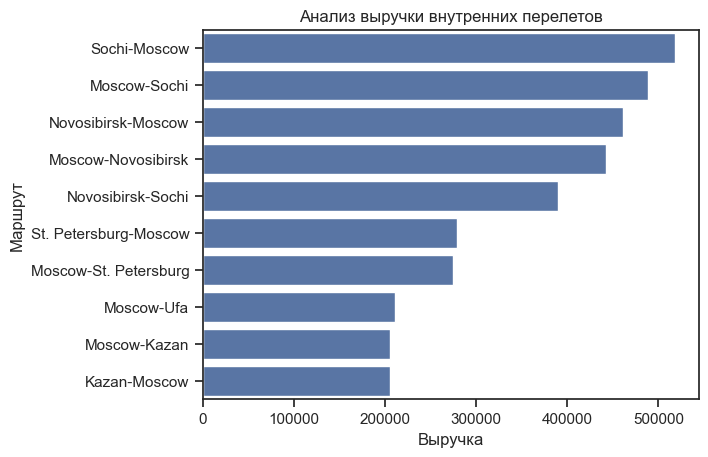

In [51]:
sns.barplot(data=resultvvl.sort_values(by = 'revenue_amount', ascending = False), x='revenue_amount', y='route')
plt.title('Анализ выручки внутренних перелетов')
plt.xlabel('Выручка')
plt.ylabel('Маршрут');

По данному графику можно сказать, что самую большую выручку генерируют два города в связке с Москвой: Новосибирск и Сочи. Вероятно, курортный Сочи обеспечивает стабильно большой поток туристов со всей страны каждое лето как единственный внутренний курорт. К тому же, люди в безальтернативной ситуации готовы платить за билеты с наценкой.

Новосибирск же находится далеко, что уже повышает стоимость билетов. К тому же он является воротами в центральную азию и дальний восток, откуда поступает дополнительный поток пассажиров, а также часть пассажиров из зарубежья на трансферте.

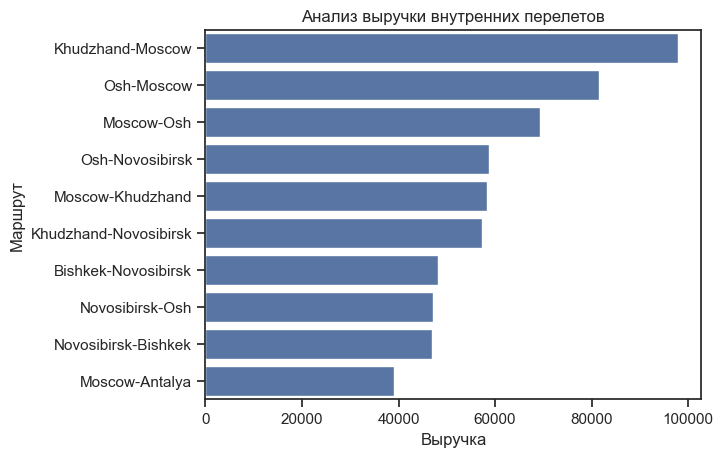

In [52]:
sns.barplot(data=resultmvl.sort_values(by = 'revenue_amount', ascending = False), x='revenue_amount', y='route')
plt.title('Анализ выручки внутренних перелетов')
plt.xlabel('Выручка')
plt.ylabel('Маршрут');

Что касается международных перелетов, тут, ожидаемо, максимальная выручка генерируется за счет огромного пассажиропотока из Таджикистана и Узбекистана. Максимальная - на Маршруте Худжанд - Москва. В данном случае цена билета высока, так как расстояние большое. Оставшаяся часть пассажиропотока из Таджикистана проходит через трансфер в Сибири.

Определю, есть ли зависимость выручки от других признаков и построю матрицу корреляций. <a id="36"></a>

In [53]:
data.sample(5)

,issue_date,flight_date_loc,pax_type,revenue_amount,orig_city_code,dest_city_code,route_flight_type,ffp_flag,sale_type,monthy,month,season,ddifference,hurry,departure_city,arrival_city,route
29428,2021-11-25,2021-12-02,AD,140,DME,ULY,ВВЛ,FFP,ONLINE,2021-11,11,Осень,7,За месяц,Moscow,Ulyanovsk,Moscow-Ulyanovsk
46186,2022-07-12,2022-08-15,AD,190,KHV,VVO,ВВЛ,FFP,ONLINE,2022-07,7,Лето,34,Более чем за месяц,Khabarovsk,Vladivostok,Khabarovsk-Vladivostok
48281,2021-10-01,2021-12-31,AD,370,DME,MRV,ВВЛ,None,ONLINE,2021-10,10,Осень,91,Более чем за месяц,Moscow,Mineralnye Vody,Moscow-Mineralnye Vody
1812,2022-05-23,2022-08-04,AD,650,OVB,KGD,ВВЛ,None,OFFLINE,2022-05,5,Весна,73,Более чем за месяц,Novosibirsk,Kaliningrad,Novosibirsk-Kaliningrad
21116,2022-09-06,2022-09-08,AD,130,DME,LED,ВВЛ,FFP,ONLINE,2022-09,9,Осень,2,В последнюю неделю,Moscow,St. Petersburg,Moscow-St. Petersburg


В данной работе я еще не рассмотрел зависимость выручки от типа пассажиров, от месяца, по запас времени от покупки до вылета. Займусь этим ниже:

Корреляция между месяцем и выручкой: 0.19519013197808865


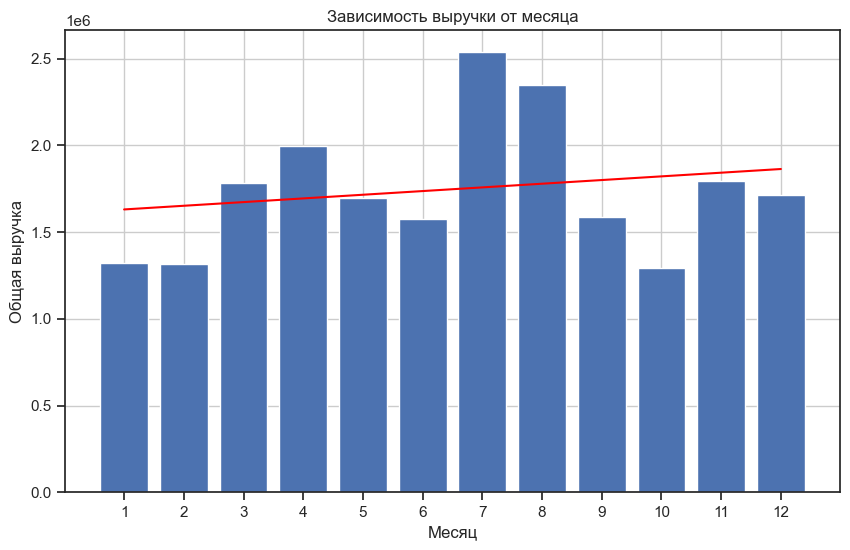

In [54]:
monthly_revenue = data.groupby('month')['revenue_amount'].sum().reset_index()
correlation = monthly_revenue['month'].corr(monthly_revenue['revenue_amount'])
print(f'Корреляция между месяцем и выручкой: {correlation}')
plt.figure(figsize=(10,6))
plt.bar(monthly_revenue['month'], monthly_revenue['revenue_amount'])

plt.title('Зависимость выручки от месяца')
plt.xlabel('Месяц')
plt.ylabel('Общая выручка')
plt.xticks(np.arange(1, 13, step=1))
plt.grid(True)

z = np.polyfit(monthly_revenue['month'], monthly_revenue['revenue_amount'], 1)
p = np.poly1d(z)
plt.plot(monthly_revenue['month'], p(monthly_revenue['month']), color="red")

plt.show()


Как следует из графика выше - корреляция выручки в зависимости от месяца не достигает даже 20%. Будем считать её чрезвычайно слабой.

Корреляция между количеством дней до полета и выручкой: -0.4970718635485956


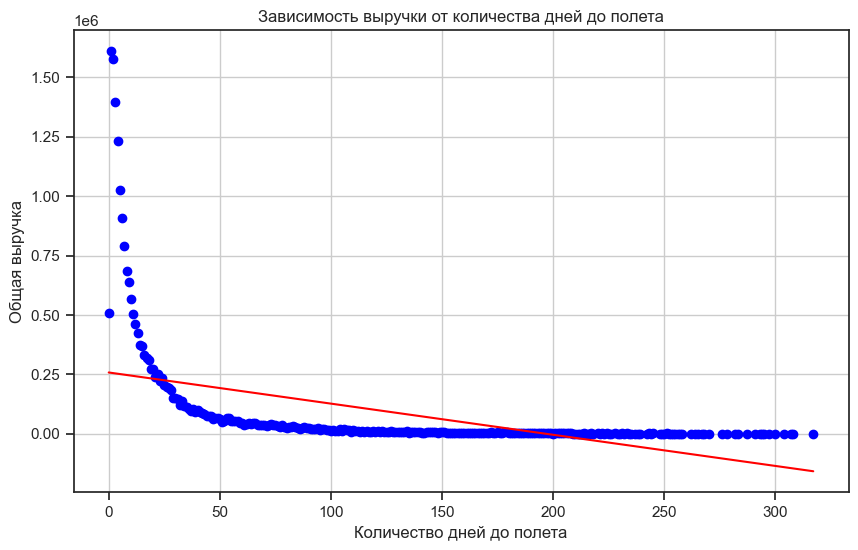

In [55]:
ddifference_revenue = data.groupby('ddifference')['revenue_amount'].sum().reset_index()

correlation = ddifference_revenue['ddifference'].corr(ddifference_revenue['revenue_amount'])
print(f'Корреляция между количеством дней до полета и выручкой: {correlation}')

plt.figure(figsize=(10,6))
plt.scatter(ddifference_revenue['ddifference'], ddifference_revenue['revenue_amount'], color='blue')

plt.title('Зависимость выручки от количества дней до полета')
plt.xlabel('Количество дней до полета')
plt.ylabel('Общая выручка')
plt.grid(True)

z = np.polyfit(ddifference_revenue['ddifference'], ddifference_revenue['revenue_amount'], 1)
p = np.poly1d(z)
plt.plot(ddifference_revenue['ddifference'], p(ddifference_revenue['ddifference']), color="red")

plt.show()

Обратную корреляцию можно проследить между тем насколько заранее был куплен билет и какая выручка была извлечена компаний. Большинство людей покупают билет ближе к дате вылета. Поэтому они и создают большую выручку.

Важным считаю отметить, что визуально выручка больше от тех, кто покупает в последний день, однако таких пассажиров подавляющее меньшинство (что подтверждается графиками, которые я приводил ранее), поэтому суммарная абсолютная выручка таких пассажиров, безусловно, меньше, чем у тех, кто покупал билеты хоть чуточку заранее.

Дополнительно проверю корреляцию средней цены билета и дней до вылета ради интереса

Корреляция между количеством дней до полета и суммой покупки: 0.04939968546900659


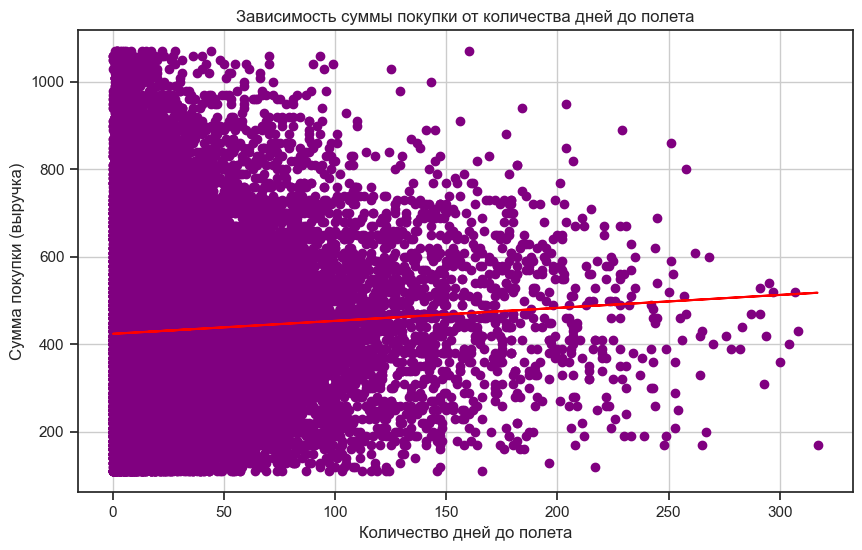

In [56]:
correlation = data['ddifference'].corr(data['revenue_amount'])
print(f'Корреляция между количеством дней до полета и суммой покупки: {correlation}')

plt.figure(figsize=(10,6))
plt.scatter(data['ddifference'], data['revenue_amount'], color='purple')

plt.title('Зависимость суммы покупки от количества дней до полета')
plt.xlabel('Количество дней до полета')
plt.ylabel('Сумма покупки (выручка)')
plt.grid(True)

z = np.polyfit(data['ddifference'], data['revenue_amount'], 1)
p = np.poly1d(z)
plt.plot(data['ddifference'], p(data['ddifference']), color="red")

plt.show()

Наконец прослежу связь между выручкой и типом пассажира

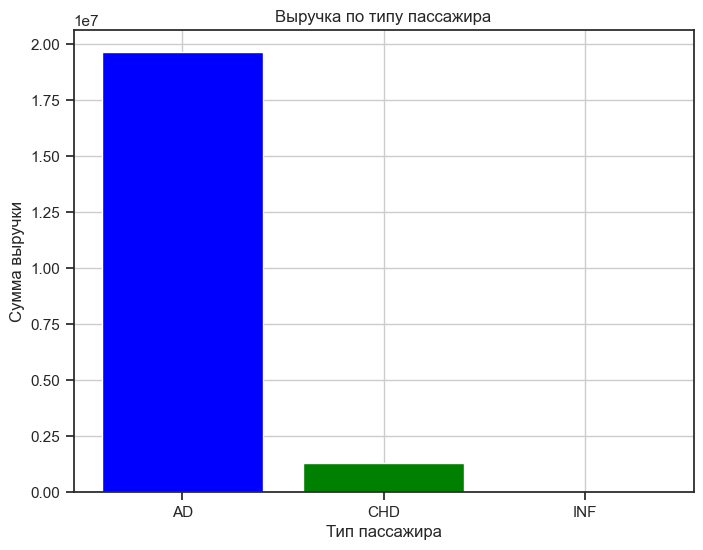

In [57]:
pax_revenue = data.groupby('pax_type')['revenue_amount'].sum().reset_index()

# Визуализируем сумму выручки по типу пассажира
plt.figure(figsize=(8,6))
plt.bar(pax_revenue['pax_type'], pax_revenue['revenue_amount'], color=['blue', 'green', 'orange'])

plt.title('Выручка по типу пассажира')
plt.xlabel('Тип пассажира')
plt.ylabel('Сумма выручки')
plt.grid(True)

plt.show()

Тут явно заметно, что основную выручку генерирует взрослое население. Оно же в пропорции имеет такой же вес как и на графике выше. Откровения не случилось.

Подытожить можно исследоватние в подпункте построением матрицы корреляций:

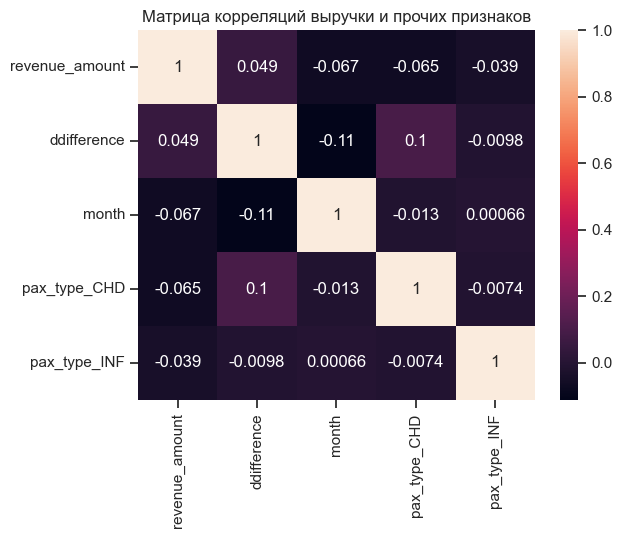

In [58]:
corrdata = data[['revenue_amount', 'ddifference', 'pax_type', 'month']]
corrdata_encoded = pd.get_dummies(corrdata, columns=['pax_type'], drop_first=True)

correlation_matrix = corrdata_encoded.corr()

plt.title('Матрица корреляций выручки и прочих признаков')
sns.heatmap(correlation_matrix, annot = True);

## Общий вывод <a id="0"></a>

В ходе работы была проведена **предварительная обработка данных**, в ходе которой:
* Было удалено 3 пропуска
* Заполнено 30602 пропуска
* Удалено 466 нулевых значений

После предварительной обработки данных был проведен **исследовательский анализ данных**:

В первом блоке я изучал данные о темпе продаж и выручке:

* Было установлено, что наименьшая выручка и динамика продаж прослеживается в выходные дни, а наибольшая - по вторникам и средам.
* Пользователи с программой лояльности не приносят качественно отличной от обычных пользователей выручки. Помимо этого они не отличаются значительно и по темпам покупки авиабилетов
* Внутренние авиаперелеты - короли рынка. По ним происходит большинство продаж, которое создает большинство выручки. При этом большинство операций по покупке происходят онлайн.

В следующем блоке я тщательнее исследовал временные данные и выяснил, что:

* Пик продаж - июль и ноябрь месяц, а вот максимальная выручка достигается в июле и апреле.
* Подтверждена корреляции выручки и числа проданных билетов. Аномальных категорий или временных промежутков не выявлено.
* Установлено, что нет статистически значимой разницы в выручке осенью и зимой.
* Есть статистически значимые различия между каждыми двумя группами людей, образованными в зависимости от того как заранее был приобретен билет (в моем исследовании - это те, кто купил билет *день в день*, *за неделю*, *за месяц* и *более чем за месяц*). Эта информация была получена при помощи дисперсионного анализа и теста Тьюки
* Есть статистически значимые различия в абсолютной суммарной выручке между группами людей, образованными в зависимости от того как заранее был приобретен билет. Эта информация была получена в ходе проведения теста Краскела-Уоллиса

В следующем блоке я исследовал внешние и внутренние перелеты. Были получены объективные данные и на их основе сформированы гипотезы о пассажиропотоках:

* На рынке **внутренних перелетов** лидируют направления в и из Москвы. Это связано с тем, что в москве само большое городское население в стране, что обуславливает большой пассажирский трафик. Помимо этого Москва имеет множество аэропортов, которые служат пересадочными хабами для перелетов внутри и за пределами страны, а также она расположена в европейской части страны, что выгодно выделяет её как транспортный хаб в Европу и Америку. Из москвы часто летают на Сочинские курорты, в Северную столицу России - Санкт-Петербург а также в центральноазиатский транспортный хаб - Новосибирск
* На рынке **международных перелетов** лидируют перелеты в Среднюю азию, что обусловлено миграцией (в т.ч. трудовой) из стран ближнего зарубежья, а также на близлежащие дешевые курорты
* Самую большую выручку генерируют два города в связке с Москвой: Новосибирск и Сочи. Вероятно, курортный Сочи обеспечивает стабильно большой поток туристов со всей страны каждое лето как единственный внутренний курорт. К тому же, люди в безальтернативной ситуации готовы платить за билеты с наценкой.
* Новосибирск находится далеко, что повышает стоимость билетов. Он является воротами в центральную азию и дальний восток, откуда поступает дополнительный поток пассажиров, а также часть пассажиров из зарубежья на трансферте.
* Максимальная выручка в международных перелетах генерируется за счет огромного пассажиропотока из Таджикистана и Узбекистана. Максимальная - на Маршруте Худжанд - Москва. В данном случае цена билета высока, так как расстояние большое. Оставшаяся часть пассажиропотока из Таджикистана проходит через трансфер в Сибири.

В последнем блоке исследовательсеого анализа я проверил корреляции некоторых параметров с выручкой:
* Корреляция выручки в зависимости от месяца не достигает даже 20%.
* Обратную корреляцию можно проследить между тем насколько заранее был куплен билет и какая выручка была извлечена компаний. Большинство людей покупают билет ближе к дате вылета. Поэтому они и создают большую выручку.
* Основную выручку генерирует взрослое население. Оно же в пропорции имеет такой же вес как и на графике выше. Откровения не случилось.

[]

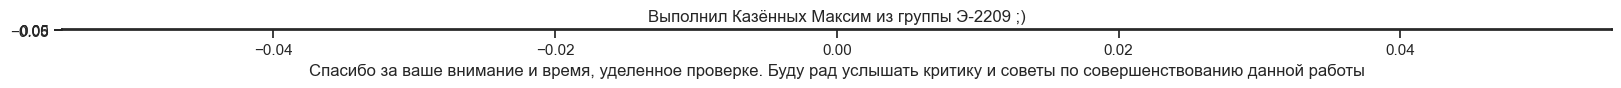

In [59]:
plt.figure(figsize=(20, 0.01))
plt.title('Выполнил Казённых Максим из группы Э-2209 ;)')
plt.xlabel('Спасибо за ваше внимание и время, уделенное проверке. Буду рад услышать критику и советы по совершенствованию данной работы')
plt.plot()